# Çalışan Yıpranma Tahmini Projesi

## Problemin Tanımı ve Amaçlar

Kurumsal şirketlerin en önemli sıkıntılarından birisi de çalışanların şirket bağlılığının ve memnuniyetinin ölçülebilmesidir. Bu bilgiyi kullanarak şirketler çalışanlarına daha iyi bir çalışma ortamı sunabilmek ve çalışan mutluluğunu arttırabilmek için ne tür aksiyonlar almaları gerektiğine karar verebilir.

Aynı zamanda, kişi bazında yapılan analizlerde hangi çalışanların işten ayrılma ihtimalinin olduğu tespit edilebilirse şirket bu çalışanı elinde tutmak için bu kişiye promosyon teklif edebilir, veya bu kişinin yaşadığı sıkıntıları ortadan kaldırabilir.

Bu projedeki amaç, çalışan bilgilerini kullanarak hangi çalışanların yıpranma payının daha fazla olduğunu, dolayısıyla da işten ayrılmaya daha yatkın olabileceğini tespit etmektir. Bunu yaparken çalışan yıpranmasında hangi sebeplerin daha önemli olduğu bilgisini de bulmanız beklenmektedir.

#### Veri

Bu proje için kullanılacak veride toplamda 35 kolon bulunmaktadır.

| Name                       | Description                                                                                                                                                    |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| AGE                        | Numerical Value                                                                                                                                                |
| ATTRITION                  | Employee leaving the company (0=no, 1=yes)                                                                                                                     |
| BUSINESS TRAVEL            | (1=No Travel, 2=Travel Frequently, 3=Tavel Rarely)                                                                                                             |
| DAILY RATE                 | Numerical Value - Salary Level                                                                                                                                 |
| DEPARTMENT                 | (1=HR, 2=R&D, 3=Sales)                                                                                                                                         |
| DISTANCE FROM HOME         | Numerical Value - THE DISTANCE FROM WORK TO HOME                                                                                                               |
| EDUCATION                  | Numerical Value                                                                                                                                                |
| EDUCATION FIELD            | (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TEHCNICAL)                                                                               |
| EMPLOYEE COUNT             | Numerical Value                                                                                                                                                |
| EMPLOYEE NUMBER            | Numerical Value - EMPLOYEE ID                                                                                                                                  |
| ENVIROMENT SATISFACTION    | Numerical Value - SATISFACTION WITH THE ENVIROMENT                                                                                                             |
| GENDER                     | (1=FEMALE, 2=MALE)                                                                                                                                             |
| HOURLY RATE                | Numerical Value - HOURLY SALARY                                                                                                                                |
| JOB INVOLVEMENT            | Numerical Value - JOB INVOLVEMENT                                                                                                                              |
| JOB LEVEL                  | Numerical Value - LEVEL OF JOB                                                                                                                                 |
| JOB ROLE                   | (1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= REASEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE) |
| JOB SATISFACTION           | Numerical Value - SATISFACTION WITH THE JOB                                                                                                                    |
| MARITAL STATUS             | (1=DIVORCED, 2=MARRIED, 3=SINGLE)                                                                                                                              |
| MONTHLY INCOME             | Numerical Value - MONTHLY SALARY                                                                                                                               |
| MONTHY RATE                | Numerical Value - MONTHY RATE                                                                                                                                  |
| NUMCOMPANIES WORKED        | Numerical Value - NO. OF COMPANIES WORKED AT                                                                                                                   |
| OVER 18                    | (1=YES, 2=NO)                                                                                                                                                  |
| OVERTIME                   | (1=NO, 2=YES)                                                                                                                                                  |
| PERCENT SALARY HIKE        | Numerical Value - PERCENTAGE INCREASE IN SALARY                                                                                                                |
| PERFORMANCE RATING         | Numerical Value - ERFORMANCE RATING                                                                                                                            |
| RELATIONS SATISFACTION     | Numerical Value - RELATIONS SATISFACTION                                                                                                                       |
| STANDARD HOURS             | Numerical Value - STANDARD HOURS                                                                                                                               |
| STOCK OPTIONS LEVEL        | Numerical Value - STOCK OPTIONS                                                                                                                                |
| TOTAL WORKING YEARS        | Numerical Value - TOTAL YEARS WORKED                                                                                                                           |
| TRAINING TIMES LAST YEAR   | Numerical Value - HOURS SPENT TRAINING                                                                                                                         |
| WORK LIFE BALANCE          | Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE                                                                                                         |
| YEARS AT COMPANY           | Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY                                                                                                         |
| YEARS IN CURRENT ROLE      | Numerical Value -YEARS IN CURRENT ROLE                                                                                                                         |
| YEARS SINCE LAST PROMOTION | Numerical Value - LAST PROMOTION                                                                                                                               |
| YEARS WITH CURRENT MANAGER | Numerical Value - YEARS SPENT WITH CURRENT MANAGER      

<hr style="height:0.5px;border-width:0;color:black;background-color:black">


## Kütüphaneler ve Ön Hazırlık

In [1]:
# Gerekli kütüphaneleri import et

import os
import numpy as np
import pandas as pd 
import seaborn as sns
# ...

### Verinin yüklenmesi

In [2]:
# veriyi train test verisi olarak yükle

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv") 
train_cleaned = pd.concat([test, train])

In [3]:
train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,30,Travel_Rarely,911,Research & Development,1,2,Medical,1,1989,4,...,80,0,12,6,2,12,8,1,7,No
1,48,Travel_Frequently,365,Research & Development,4,5,Medical,1,1644,3,...,80,1,23,3,3,2,2,2,2,No
2,27,Travel_Rarely,1469,Research & Development,1,2,Medical,1,497,4,...,80,1,5,2,3,5,2,0,4,No
3,34,Travel_Rarely,704,Sales,28,3,Marketing,1,2035,4,...,80,2,8,2,3,8,7,1,7,No
4,23,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,4,...,80,1,1,3,2,1,0,1,0,Yes


In [4]:
test.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,21,Travel_Rarely,1343,Sales,22,1,Technical Degree,1,669,3,...,80,0,3,2,3,3,2,1,2,No
1,24,Travel_Rarely,693,Sales,3,2,Life Sciences,1,720,1,...,80,0,4,3,3,2,2,2,0,Yes
2,42,Travel_Rarely,933,Research & Development,29,3,Life Sciences,1,836,2,...,80,1,10,3,2,9,8,7,8,No
3,46,Travel_Rarely,168,Sales,4,2,Marketing,1,1280,4,...,80,1,26,2,3,11,4,0,8,No
4,35,Travel_Frequently,880,Sales,12,4,Other,1,1667,4,...,80,0,13,2,4,11,9,6,7,Yes


<hr style="height:0.5px;border-width:0;color:black;background-color:black">


## Veri Ön Analizi

##### Veride hangi kolonlar mevcut?

In [5]:
train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

##### Hangi kolonlar kategorik veriler içeriyor?

In [6]:
train.dtypes[train.dtypes == 'object']

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
Attrition         object
dtype: object

##### Kolon Veri Tipleri neler? (numerik, alphanumerik, metin vb.)

In [7]:
train.info() # or train.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1176 non-null   int64 
 1   BusinessTravel            1176 non-null   object
 2   DailyRate                 1176 non-null   int64 
 3   Department                1176 non-null   object
 4   DistanceFromHome          1176 non-null   int64 
 5   Education                 1176 non-null   int64 
 6   EducationField            1176 non-null   object
 7   EmployeeCount             1176 non-null   int64 
 8   EmployeeNumber            1176 non-null   int64 
 9   EnvironmentSatisfaction   1176 non-null   int64 
 10  Gender                    1176 non-null   object
 11  HourlyRate                1176 non-null   int64 
 12  JobInvolvement            1176 non-null   int64 
 13  JobLevel                  1176 non-null   int64 
 14  JobRole                 

##### Hangi kolonda ne kadar null/boş veri mevcut? (Test verisi için de bu bilgi gösterilebilir)

In [8]:
train.isna().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [9]:
test.isna().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

- Eksik veri yok.

##### Numerik Kolonların İstatistiksel Değerleri

In [10]:
for i in range(0, len(train.columns), 2):
    print()
    subcolumns = train.columns[i: min(len(train.columns),i+2)]
    print(train[subcolumns].describe(include = 'all'))



                Age BusinessTravel
count   1176.000000           1176
unique          NaN              3
top             NaN  Travel_Rarely
freq            NaN            841
mean      36.859694            NaN
std        9.115610            NaN
min       18.000000            NaN
25%       30.000000            NaN
50%       35.000000            NaN
75%       43.000000            NaN
max       60.000000            NaN

          DailyRate              Department
count   1176.000000                    1176
unique          NaN                       3
top             NaN  Research & Development
freq            NaN                     764
mean     804.922619                     NaN
std      402.627249                     NaN
min      102.000000                     NaN
25%      466.750000                     NaN
50%      802.000000                     NaN
75%     1163.250000                     NaN
max     1499.000000                     NaN

       DistanceFromHome    Education
count       

In [11]:
train.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,36.859694,804.922619,9.329082,2.897959,1.0,1024.346939,2.724490,65.544218,2.714286,2.058673,...,2.738946,80.0,0.801871,11.352041,2.784014,2.765306,7.034014,4.254252,2.173469,4.187925
std,9.115610,402.627249,8.109130,1.030495,0.0,606.582338,1.093398,20.202669,0.718154,1.094260,...,1.078555,0.0,0.862868,7.850857,1.267982,0.700896,6.122344,3.627904,3.217057,3.629603
min,18.000000,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,466.750000,2.000000,2.000000,1.0,490.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,802.000000,7.000000,3.000000,1.0,1012.500000,3.000000,65.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1163.250000,14.000000,4.000000,1.0,1570.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2065.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- Employeenumber kolonu silinecek. 
- Standardhours kolonu kaldırılacak. (std=0) 
- Toplamda 1176 satır eğitim verisi mevcut.
- En yaşlı çalışan 60 yaşında, en genç çalışan 18 yaşında. Çalışanların çoğu 27, 45 yaş aralığında.
- EmployeeCount kolonunda sadece tek bir değer var.
- MonthlyIncome geniş bir aralığa dağılmış durumda.
- Over18 kolonu gereksiz.

##### Kategorik Kolonların İstatistiksel Değerleri

In [12]:
train.describe(include=["O"]) #count = veri girişi sayısı, unique = kaç farklı(benzersiz) değer var, top = en çok tekrar eden veri ,freq = en çok tekrar eden veri kaç kez girilmiş(frekans)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Attrition
count,1176,1176,1176,1176,1176,1176,1176,1176,1176
unique,3,3,6,2,9,3,1,2,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No,No
freq,841,764,482,711,265,543,1176,837,987


In [13]:
train["Over18"].unique()

array(['Y'], dtype=object)

In [14]:
cat_features = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "Over18", "OverTime", "Attrition"]

for feature in cat_features:
    print(feature)
    print(train[feature].value_counts())
    print()

BusinessTravel
Travel_Rarely        841
Travel_Frequently    217
Non-Travel           118
Name: BusinessTravel, dtype: int64

Department
Research & Development    764
Sales                     363
Human Resources            49
Name: Department, dtype: int64

EducationField
Life Sciences       482
Medical             365
Marketing           127
Technical Degree    111
Other                69
Human Resources      22
Name: EducationField, dtype: int64

Gender
Male      711
Female    465
Name: Gender, dtype: int64

JobRole
Sales Executive              265
Research Scientist           229
Laboratory Technician        211
Manufacturing Director       114
Healthcare Representative    102
Manager                       79
Sales Representative          68
Research Director             67
Human Resources               41
Name: JobRole, dtype: int64

MaritalStatus
Married     543
Single      369
Divorced    264
Name: MaritalStatus, dtype: int64

Over18
Y    1176
Name: Over18, dtype: int64

OverTim

##### Siralama ve Gruplama Islemleri

In [15]:
train.sort_values(by = "Age", ascending=True) # azdan çoğa 

# (ascending = True) --> yüksekten düşüğe

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
169,18,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,...,80,0,0,2,3,0,0,0,0,Yes
246,18,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,...,80,0,0,2,3,0,0,0,0,No
359,18,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,...,80,0,0,0,3,0,0,0,0,Yes
699,18,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,...,80,0,0,3,3,0,0,0,0,Yes
1096,18,Travel_Frequently,544,Sales,3,2,Medical,1,1624,2,...,80,0,0,2,4,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,59,Travel_Rarely,1435,Sales,25,3,Life Sciences,1,81,1,...,80,0,28,3,2,21,16,7,9,No
620,59,Travel_Rarely,818,Human Resources,6,2,Medical,1,321,2,...,80,0,7,2,2,2,2,2,2,No
256,60,Travel_Frequently,1499,Sales,28,3,Marketing,1,573,3,...,80,0,22,5,4,18,13,13,11,No
956,60,Travel_Rarely,370,Research & Development,1,4,Medical,1,1697,3,...,80,1,19,2,4,1,0,0,0,No


In [16]:
train.groupby("Attrition")["MonthlyIncome"].mean().head(15)

Attrition
No     6817.642351
Yes    4747.396825
Name: MonthlyIncome, dtype: float64

In [17]:
train.groupby(["Attrition","Age"])["MonthlyIncome"].mean()

Attrition  Age
No         18      1051.000000
           19      2343.000000
           20      2811.600000
           21      2199.750000
           22      2910.375000
                      ...     
Yes        52     11077.333333
           53     10448.000000
           55     12904.666667
           56      2463.000000
           58     13188.666667
Name: MonthlyIncome, Length: 82, dtype: float64

### Varsayımlar

Yaptığınız ilk gözlemler sonucunda yaptığınız varsayımları açıklayın.

In [18]:
train.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,30,Travel_Rarely,911,Research & Development,1,2,Medical,1,1989,4,...,80,0,12,6,2,12,8,1,7,No
1,48,Travel_Frequently,365,Research & Development,4,5,Medical,1,1644,3,...,80,1,23,3,3,2,2,2,2,No


In [19]:
train.head(1).to_dict()

{'Age': {0: 30},
 'BusinessTravel': {0: 'Travel_Rarely'},
 'DailyRate': {0: 911},
 'Department': {0: 'Research & Development'},
 'DistanceFromHome': {0: 1},
 'Education': {0: 2},
 'EducationField': {0: 'Medical'},
 'EmployeeCount': {0: 1},
 'EmployeeNumber': {0: 1989},
 'EnvironmentSatisfaction': {0: 4},
 'Gender': {0: 'Male'},
 'HourlyRate': {0: 76},
 'JobInvolvement': {0: 3},
 'JobLevel': {0: 1},
 'JobRole': {0: 'Laboratory Technician'},
 'JobSatisfaction': {0: 2},
 'MaritalStatus': {0: 'Married'},
 'MonthlyIncome': {0: 3748},
 'MonthlyRate': {0: 4077},
 'NumCompaniesWorked': {0: 1},
 'Over18': {0: 'Y'},
 'OverTime': {0: 'No'},
 'PercentSalaryHike': {0: 13},
 'PerformanceRating': {0: 3},
 'RelationshipSatisfaction': {0: 3},
 'StandardHours': {0: 80},
 'StockOptionLevel': {0: 0},
 'TotalWorkingYears': {0: 12},
 'TrainingTimesLastYear': {0: 6},
 'WorkLifeBalance': {0: 2},
 'YearsAtCompany': {0: 12},
 'YearsInCurrentRole': {0: 8},
 'YearsSinceLastPromotion': {0: 1},
 'YearsWithCurrManag

**Eksik Verilerin Tamamlanması:** Hangi kolonlardaki veriler tamamlanabilir?

- Eksik veri bulunmamaktadır.

**Verilerin Düzeltilmesi**: Hangi kolonlardaki veriler ne tür düzeltmelere ihtiyaç duyabilir?

- BusinessTravel,Departmant, EducationField, MaritalStatus kolonlari metin olarak verilmis, numerik kategorik formata donusturulmeli.
- Değer aralıkları arasında farklılıklar mevcut. Scaling uygulanabilir.
- EmployeeCount, EmployeeNumber, StandardHours ve Over18 kolonları kaldırılabilir.

**Yeni Özniteliklerin Yaratılması**: Bazı kolonları farklı şekillerde birleştirerek veya kolon değerlerini belirli işlemlerden geçirerek yeni öznitelikler yaratılabilir mi?

- Tecrübe yılı ve önceki çalıştığı firma sayısı kullanılarak ortalama şirket değiştirme süresi hesaplanabilir.
- Yaşın, tecrübenin, eğitimin ve iş seviyesinin maaşa oranı hesaplanabilir.
- Departman içerisindeki eğitim ve tecrübe seviyesiyle kişinin eğitim ve tecrübe seviyesi kıyaslanabilir.
- Aynı işi yapan diğer kişilerin maaşıyla mevcut kişinin maaş ortalaması kıyaslanabilir.
- Her departmanın ortalama Attrition değeri çıkarılabilir.

**Sınıflandırıcı Veriler**: Veri içerisinde model eğitimine katkı sağlayabilecek ne tür alt gruplar olabilir?

- Yaşı yüksek kişiler yıpranmaya daha açık olabilir.
- Yaşı yüksek kişiler, evli kişiler iş seyahatlerinden daha fazla yıpranıyor olabilir.
- Evli kişiler işten ayrılmaya daha az istekli olabilir.
- Evli kişiler için work life balance daha önemli olabilir.
- Genç çalışanlar için training programları daha önemli olabilir.

**İlişkili Veriler**: Veri içerisinde model eğitimine katkı sağlayabilecek ne tür ilişkiler olabilir?

- Hourly, daily, monthly rate ile income arasındaki ilişki incelenebilir.

**Ek Gözlemler/Varsayımlar**: 

-

<hr style="height:0.5px;border-width:0;color:black;background-color:black">


## Veri Analizi ve Görselleştirmeleri

### Univariate Analysis

In [20]:
cat_features = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "Over18", "OverTime", "Attrition"]
numeric_features = list(set(train.columns) - set(cat_features))

In [21]:
numeric_features, len(numeric_features)

(['EnvironmentSatisfaction',
  'StandardHours',
  'Age',
  'RelationshipSatisfaction',
  'YearsAtCompany',
  'JobSatisfaction',
  'EmployeeCount',
  'NumCompaniesWorked',
  'MonthlyRate',
  'StockOptionLevel',
  'JobInvolvement',
  'YearsSinceLastPromotion',
  'Education',
  'PerformanceRating',
  'JobLevel',
  'YearsInCurrentRole',
  'TotalWorkingYears',
  'HourlyRate',
  'EmployeeNumber',
  'DailyRate',
  'DistanceFromHome',
  'PercentSalaryHike',
  'MonthlyIncome',
  'WorkLifeBalance',
  'YearsWithCurrManager',
  'TrainingTimesLastYear'],
 26)

#### Kagetorik Kolonların Değer Dağılımlarının Görselleştirilmesi

In [22]:
train.dtypes[train.dtypes == "O"] # Object

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
Attrition         object
dtype: object

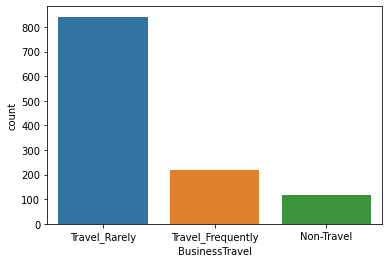

In [23]:
# Business Travel 
_=sns.countplot(x="BusinessTravel", data=train)

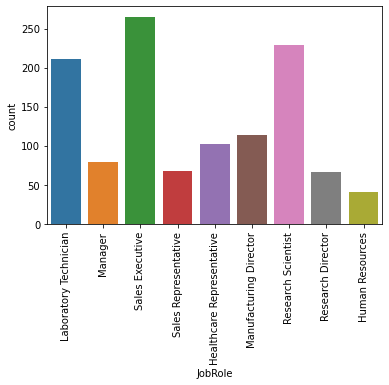

In [24]:
# JobRole 
_=sns.countplot(x="JobRole", data=train) 
_.tick_params(axis="x", rotation=90)

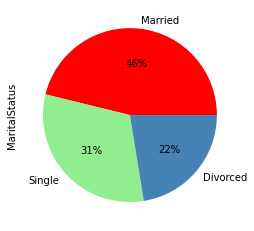

In [25]:
# MaritalStatus 
MaritalStatus = train.MaritalStatus.value_counts() 
_= MaritalStatus.plot(kind='pie', autopct='%1.0f%%', colors = ['red', 'lightgreen', 'steelblue'])

C:\Users\Fulden\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


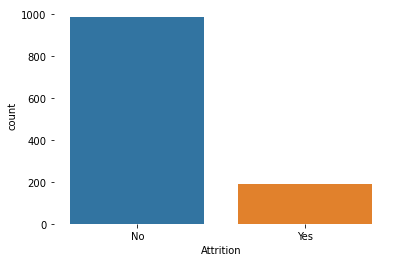

In [26]:
# Attrition 
sns.countplot(train["Attrition"])
_=sns.despine(left=True, bottom=True)

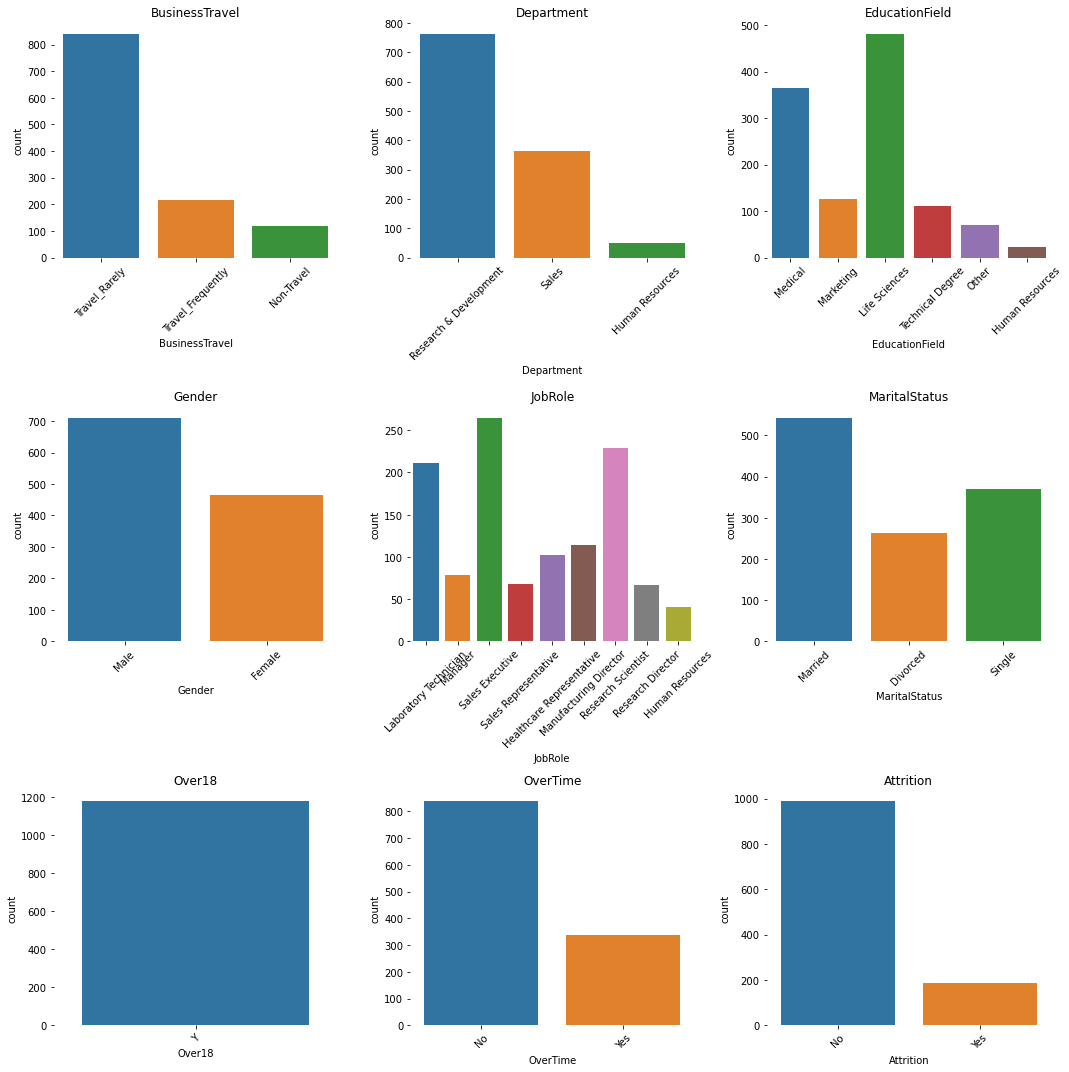

In [27]:
import matplotlib.pyplot as plt  
num_rows = 3
num_cols = 3
fig, ax = plt.subplots(num_cols, num_rows, figsize=(15, 15))
row = -1
for i in range(num_rows * num_cols):
    col = i % num_cols
    if col == 0:
        row += 1
    if i < len(cat_features):
        feature = cat_features[i]
        plot = sns.countplot(x=feature, data=train, ax=ax[row,col])
        plot.set_title(feature)
        plot.set_xticklabels(plot.get_xticklabels(),rotation = 45)
        sns.despine(left=True, bottom=True)
        
fig.tight_layout()

#### Yorumlar

- BusinesssTravel imbalanced. 
- İşten ayrılan kişi sayısında dengesizlik mevcut. Başarım metrikleri buna göre düzenlenmeli.
- Çoğu çalışan nadiren iş gezisine çıkıyor. Eğer bir korelasyon bulunmazsa nadiren iş gezisine çıkanlar non-travel ile birleştirilebilir.
- Human resources departmanında çalışan çok az kişi var.
- Çalışanların çoğu medical ve life sciences eğitimine sahip.
- Kadın erkek çalışanları arasında ciddi bir dengesizlik bulunmamakta.
- Over18 kolonu gereksiz.
- Çalışanların çoğu OverTime çalışmıyor. Overtime çalışmakla yıpranma arasında bir ilişki olabilir.

#### Numerik Kolonların Değer Dağılımlarının Görselleştirilmesi

In [28]:
train.dtypes[train.dtypes == "int64"]

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

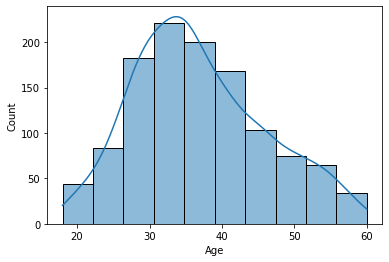

In [29]:
_=sns.histplot(data=train, x="Age",stat="count", bins=10, kde=True)

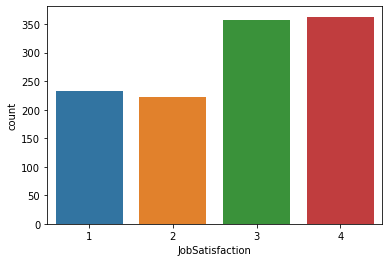

In [30]:
_=sns.countplot(data=train, x="JobSatisfaction")

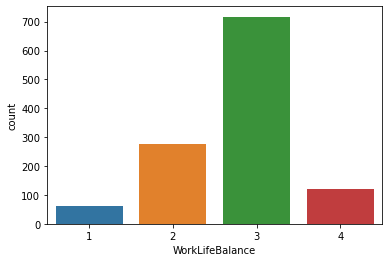

In [31]:
_=sns.countplot(data=train, x="WorkLifeBalance")

C:\Users\Fulden\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Fulden\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


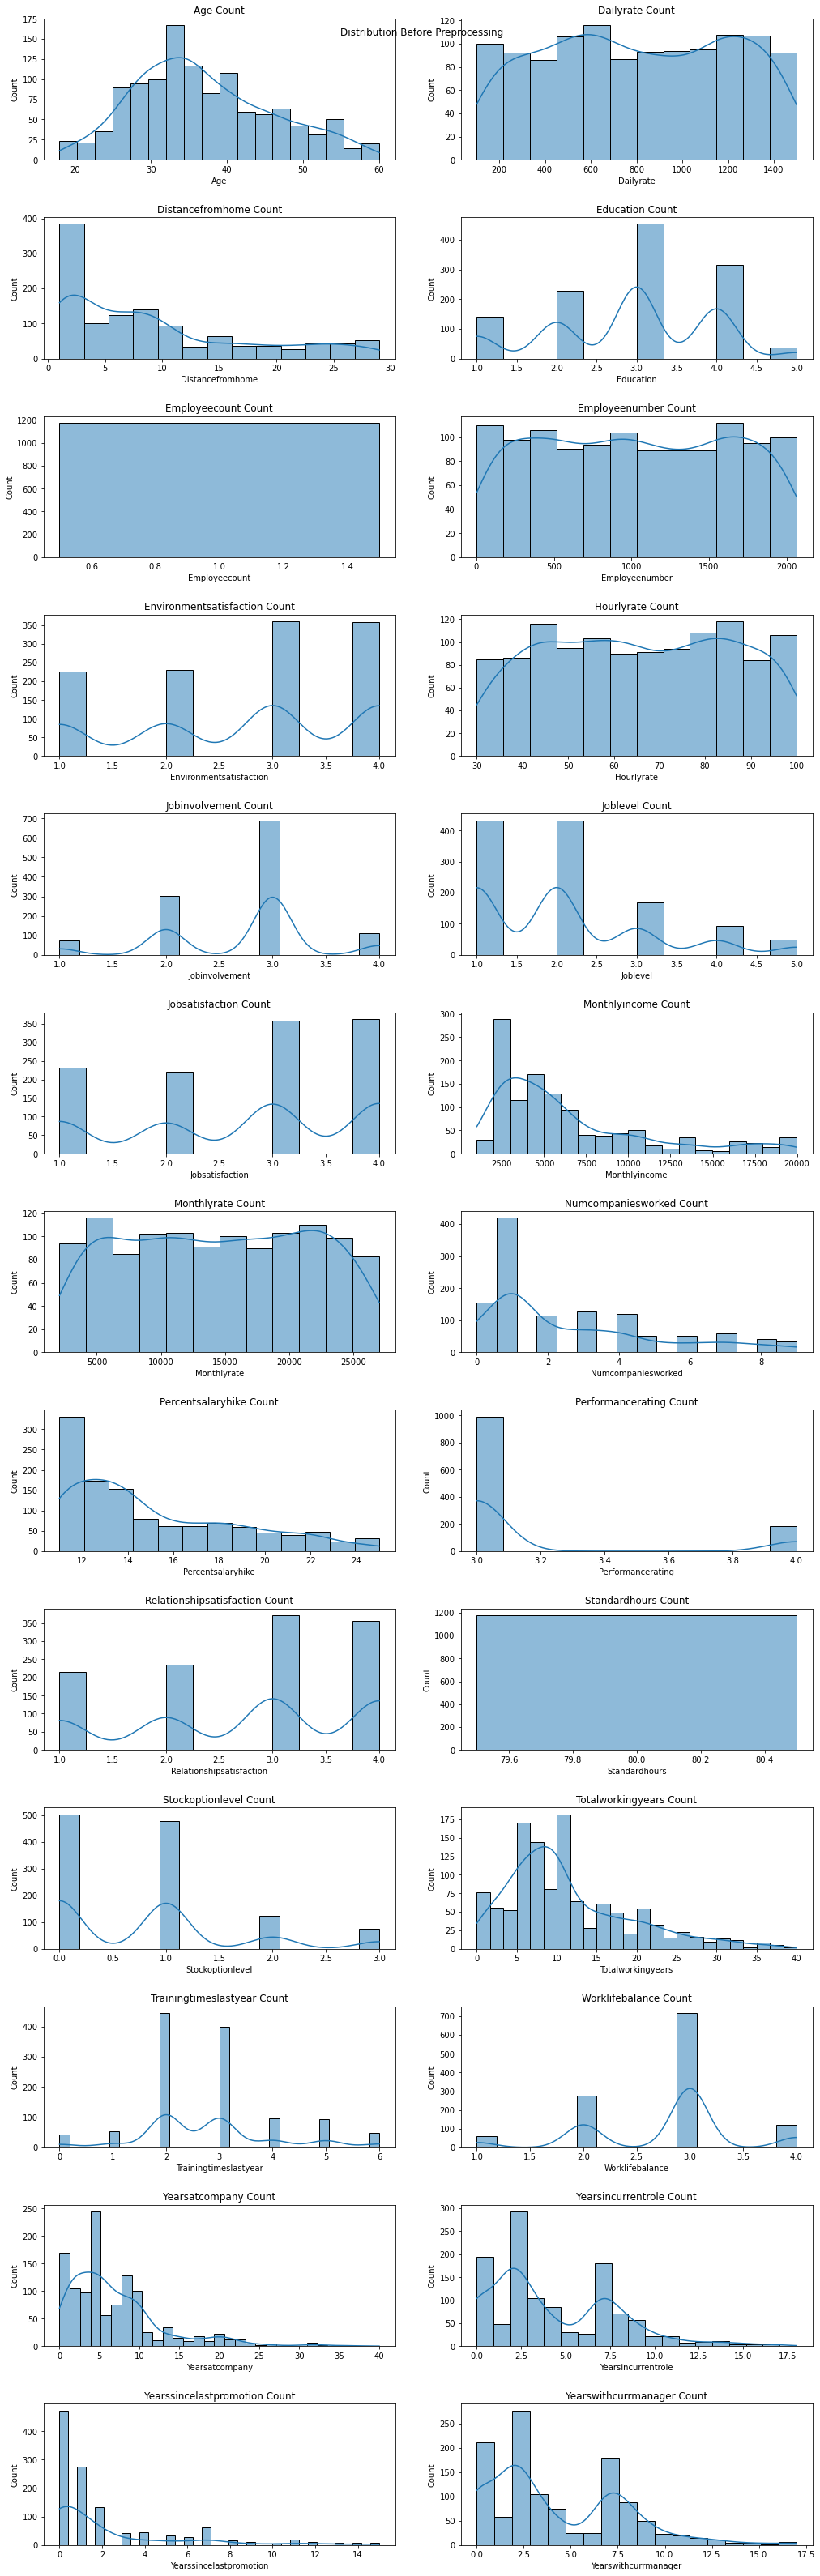

In [32]:
#import warnings 
#warnings.filterwarnings("ignore") 

f, axes = plt.subplots(13, 2, figsize= (15,45))
f.tight_layout(pad=5)# gorseller arasi 5 birim bosluk birak
f.suptitle("Distribution Before Preprocessing")
cols = train.select_dtypes(exclude="object").columns

x_axis = 0
y_axis = 0

for col in cols:
  sns.histplot(data=train, x=col, kde=True, ax=axes[x_axis, y_axis])
  axes[x_axis,y_axis].set_xlabel(col.title())
  axes[x_axis,y_axis].set_ylabel("Count")
  axes[x_axis,y_axis].set_title(f"{col.title()} Count")
  
  if y_axis == 1:
    y_axis = 0
    x_axis += 1
    # continue 
  else:
    y_axis += 1

C:\Users\Fulden\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Fulden\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


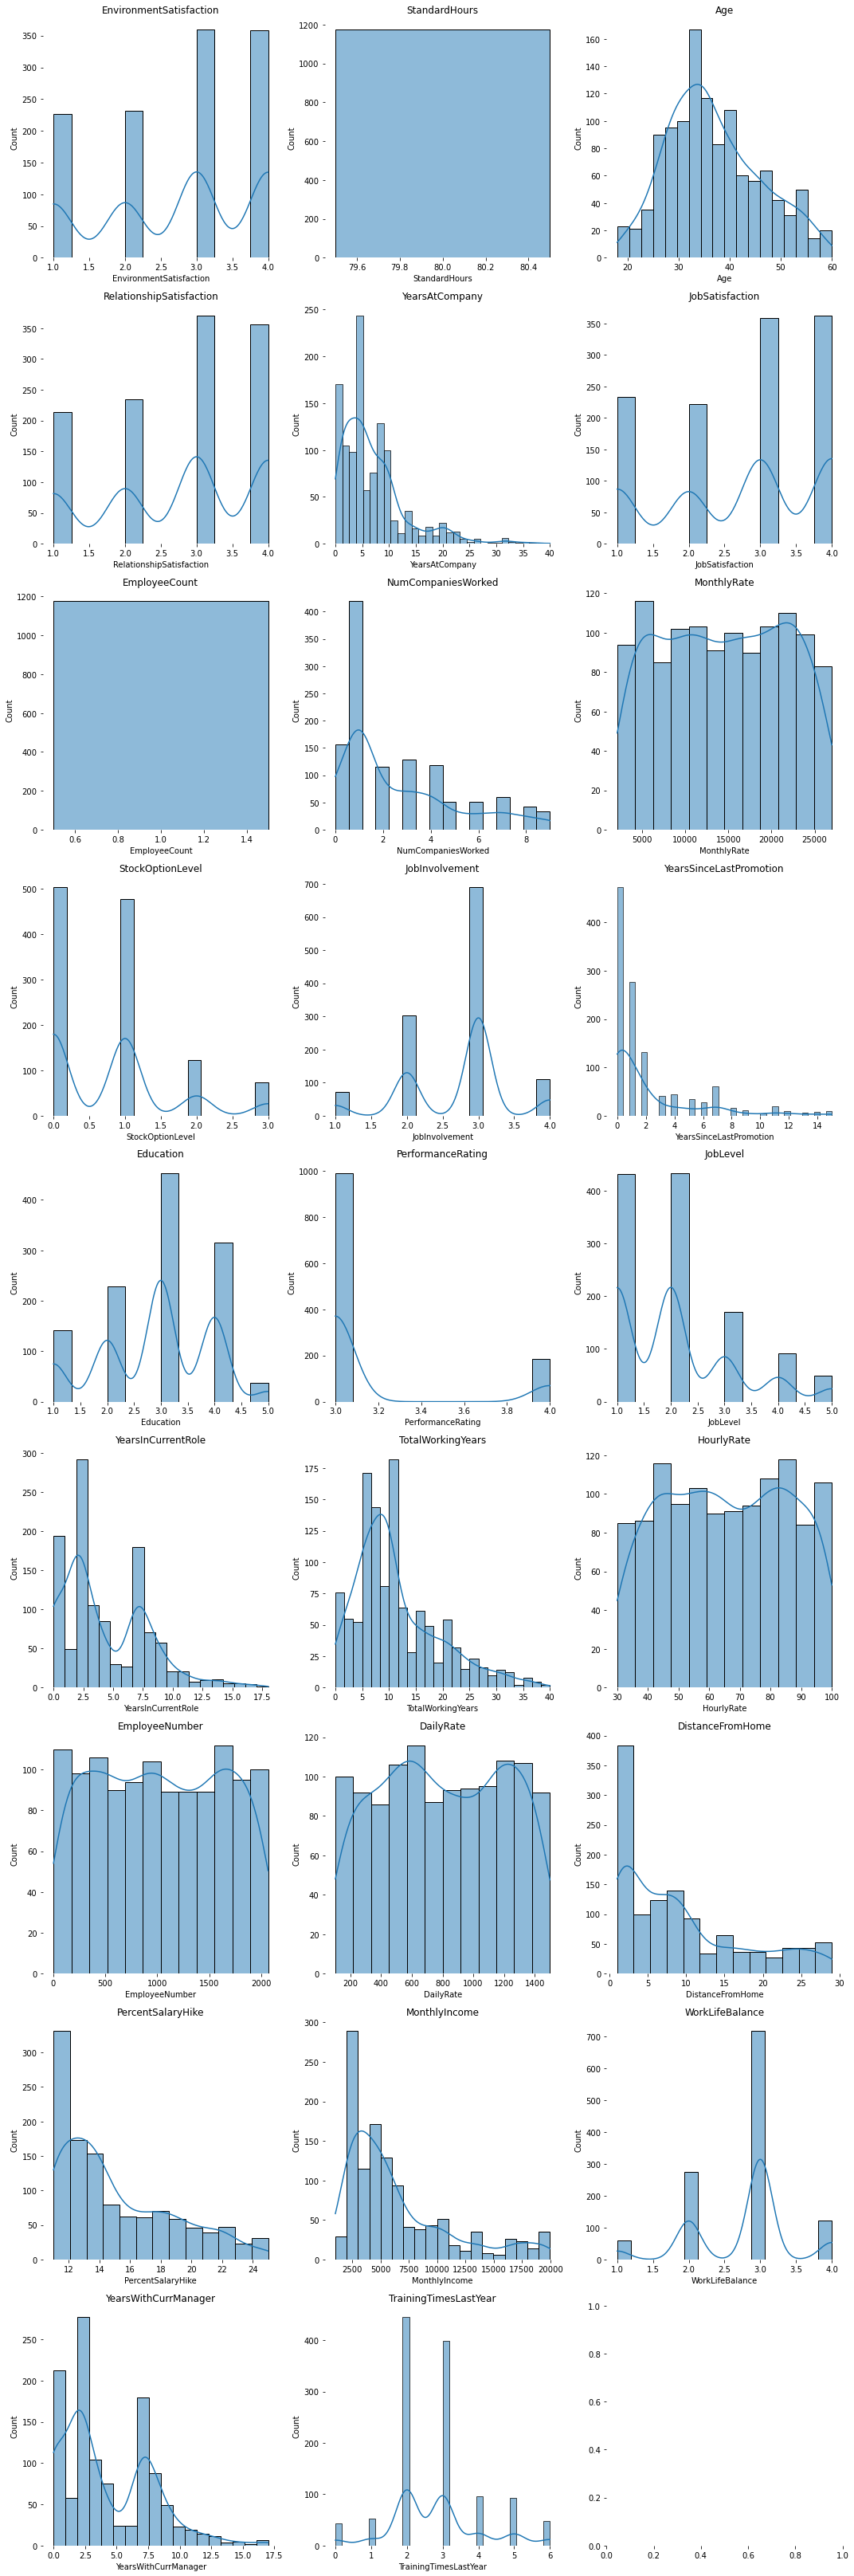

In [33]:
# Farklı şekilde aynı gösterim için:
num_rows = 9
num_cols = 3
fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 45))
row = -1
for i in range(num_rows * num_cols):
    col = i % num_cols
    if col == 0:
        row += 1
    if i < len(numeric_features):
        feature = numeric_features[i]
        plot = sns.histplot(x=feature, data=train, ax=ax[row,col], kde=True)
        plot.set_title(feature)
        sns.despine(left=True, bottom=True)
        
fig.tight_layout()

#### Yorumlar

- Yearsincurrentrole and Yearswithcurrmanager have same distribution 
- Distancefromhome seems no effect on attrition. 
- Standard Hours ve EmployeeCount kaldırılmalı.
- Years at Company 7 yıl civarında yığılmış durumda. 0-5, 5-10, 10> şeklinde üç kategoriye indirgenebilir.
- Yaş dağılımı normal dağılıma benzer görünüyor.
- Job ve relation satisfaction kolonlarında 1,2 seçenekleriyle 3,4 seçenekleri arasında benzer bir ayrım var. Aralarında bir korelasyon olabilir.
- Çalışanların yarısından azının stock option'u bulunmamakta. Eğer 2, 3 olmasıyla alakalı bir korelasyon yoksa stok var - stok yok şekline indirgenebilir.
- Çalışanlar arasında aylık gelir dengesizliği var. Çalışan seviyesine kıyasla düşül-orta-yüksek şeklinde üç kategorili yeni  bir kolon yaratılabilir.
- Mevcut rolde çalışma kolonunda 5 yıl civarında keskin bir ayrım mevcut. <5 >5 şeklinde binary yeni bir kolon yaratılabilir. 
- Çoğu çalışan kısa süre içerisinde terfi almış. Yakın zamanda terfi aldı-almadı şeklinde bir kolon yaratılabilir.
- Bazı çalışanlar diğerlerinden daha fazla zam almış durumda. 
- Şu anda ilk şirketinde çalışmakta olan çok fazla çalışan var. İlk şirketi veya değil şeklinde yeni bir kolon yaratılabilir.
- 5 yıldan fazladır mevcut yöneticiyle veya değil şeklinde bir kolon yaratılabilir.
- Çoğu çalışana iş yeri oldukça yakın. Yakın-orta-uzak şeklinde bir kolon yaratılabilir.
- Toplam çalışma yılında 10 yıl civarı bir yığılma mevcut. Bu veri de kategorik hale getirilebilir.

### Bivariate Analysis

#### Kategorik Kolonlar ile Hedef Arasındaki İlişkilerin Görselleştirilmesi 

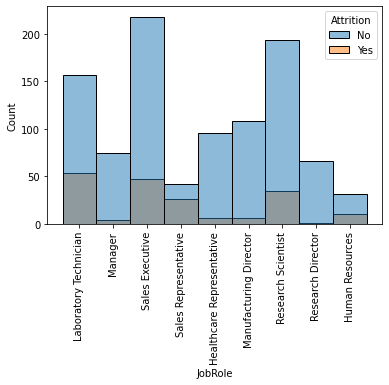

In [34]:
_=sns.histplot(data=train, x="JobRole", common_norm=False, hue="Attrition") 
_.tick_params(axis="x", rotation=90)

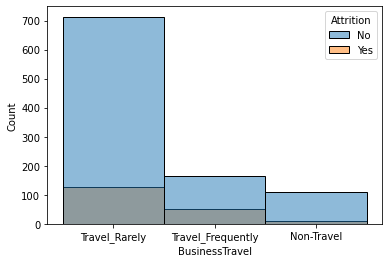

In [35]:
_=sns.histplot(data=train, x="BusinessTravel", common_norm=False, hue="Attrition") 

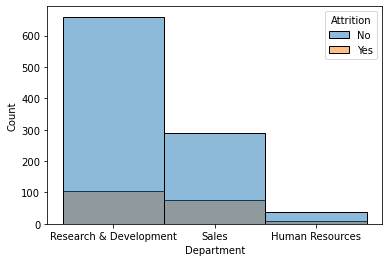

In [36]:
_=sns.histplot(data=train, x="Department", common_norm=False, hue="Attrition") 

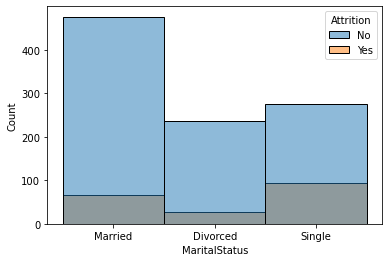

In [37]:
_=sns.histplot(data=train, x="MaritalStatus", common_norm=False, hue="Attrition") 

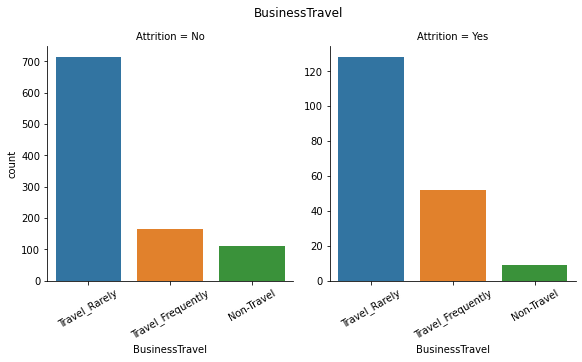

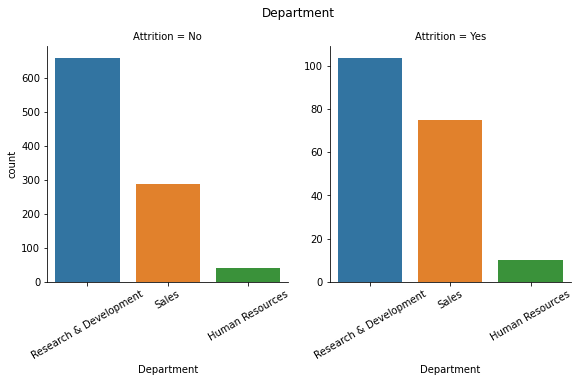

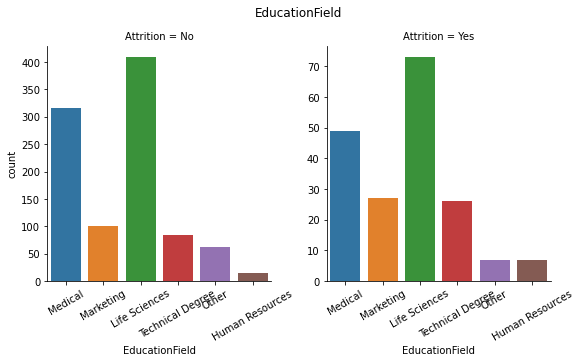

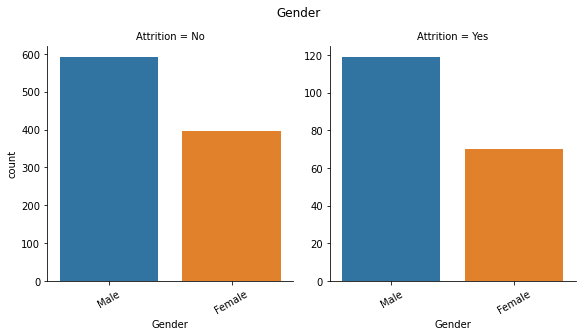

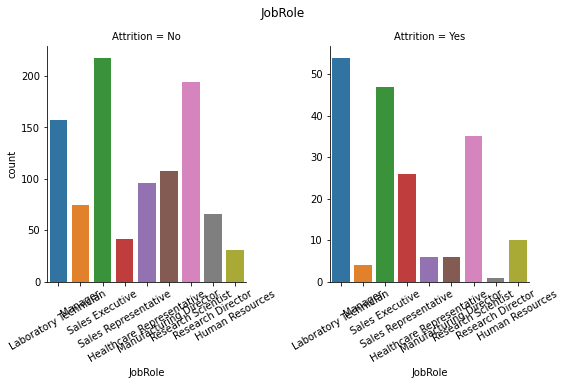

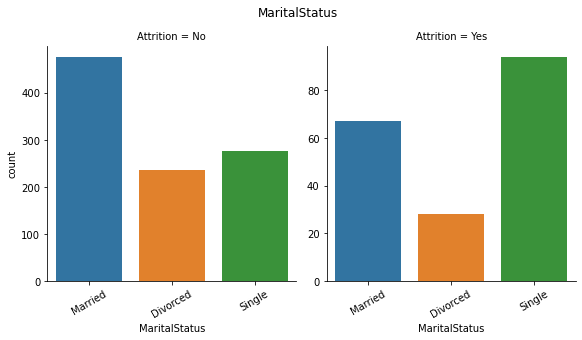

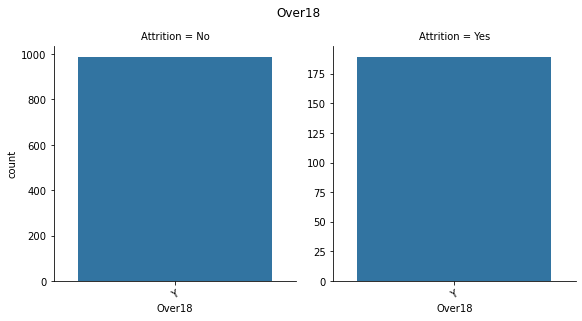

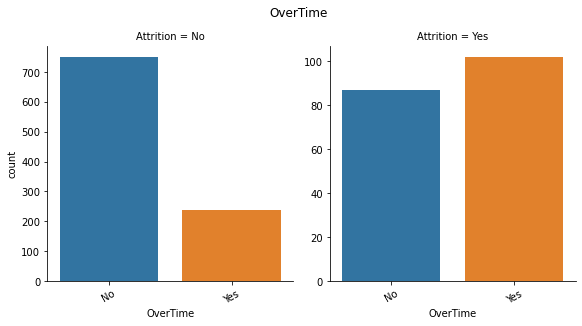

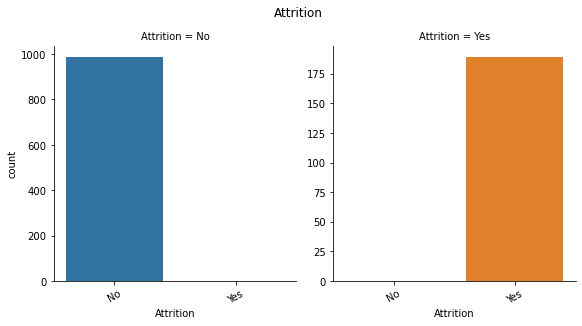

In [38]:
for feature in cat_features:
    fig = sns.catplot(x=feature, kind="count", col="Attrition", sharey=False, data=train, height=4, col_wrap=2)
    fig.fig.suptitle(feature, y=1.05)  
    fig.set_xticklabels(rotation=30) # or plt.xticks(rotation=30)

#### Yorumlar

- Cinsiyetin attrition üzerinde doğrudan bir korelasyonu olmayabilir.
- Satış departmanındaki attrition oranı diğer departmanlara oranla daha yüksek gibi duruyor.
- JobRole kolonunun değerlerinin dağılımı attrition'a göre farklılık gösteriyor. Bir korelasyon olabilir.
- Bekarlık ile Attrition arasında bir ilişki olabilir.
- OverTime kolonuyla Attrition arasında bariz bir korelasyon mevcut.

#### Numerik Kolonlar ile Hedef Arasındaki İlişkilerin Görselleştirilmesi

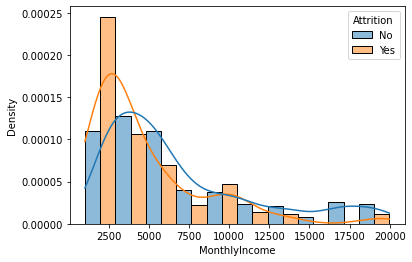

In [39]:
_=sns.histplot(data=train, x="MonthlyIncome", bins=10, kde=True, common_norm=False, stat="density", multiple ="dodge",  hue="Attrition")

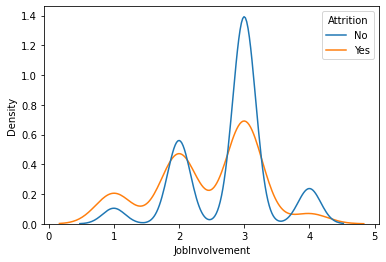

In [40]:
_=sns.kdeplot(data=train, x="JobInvolvement", common_norm=False, hue="Attrition")

C:\Users\Fulden\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Fulden\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


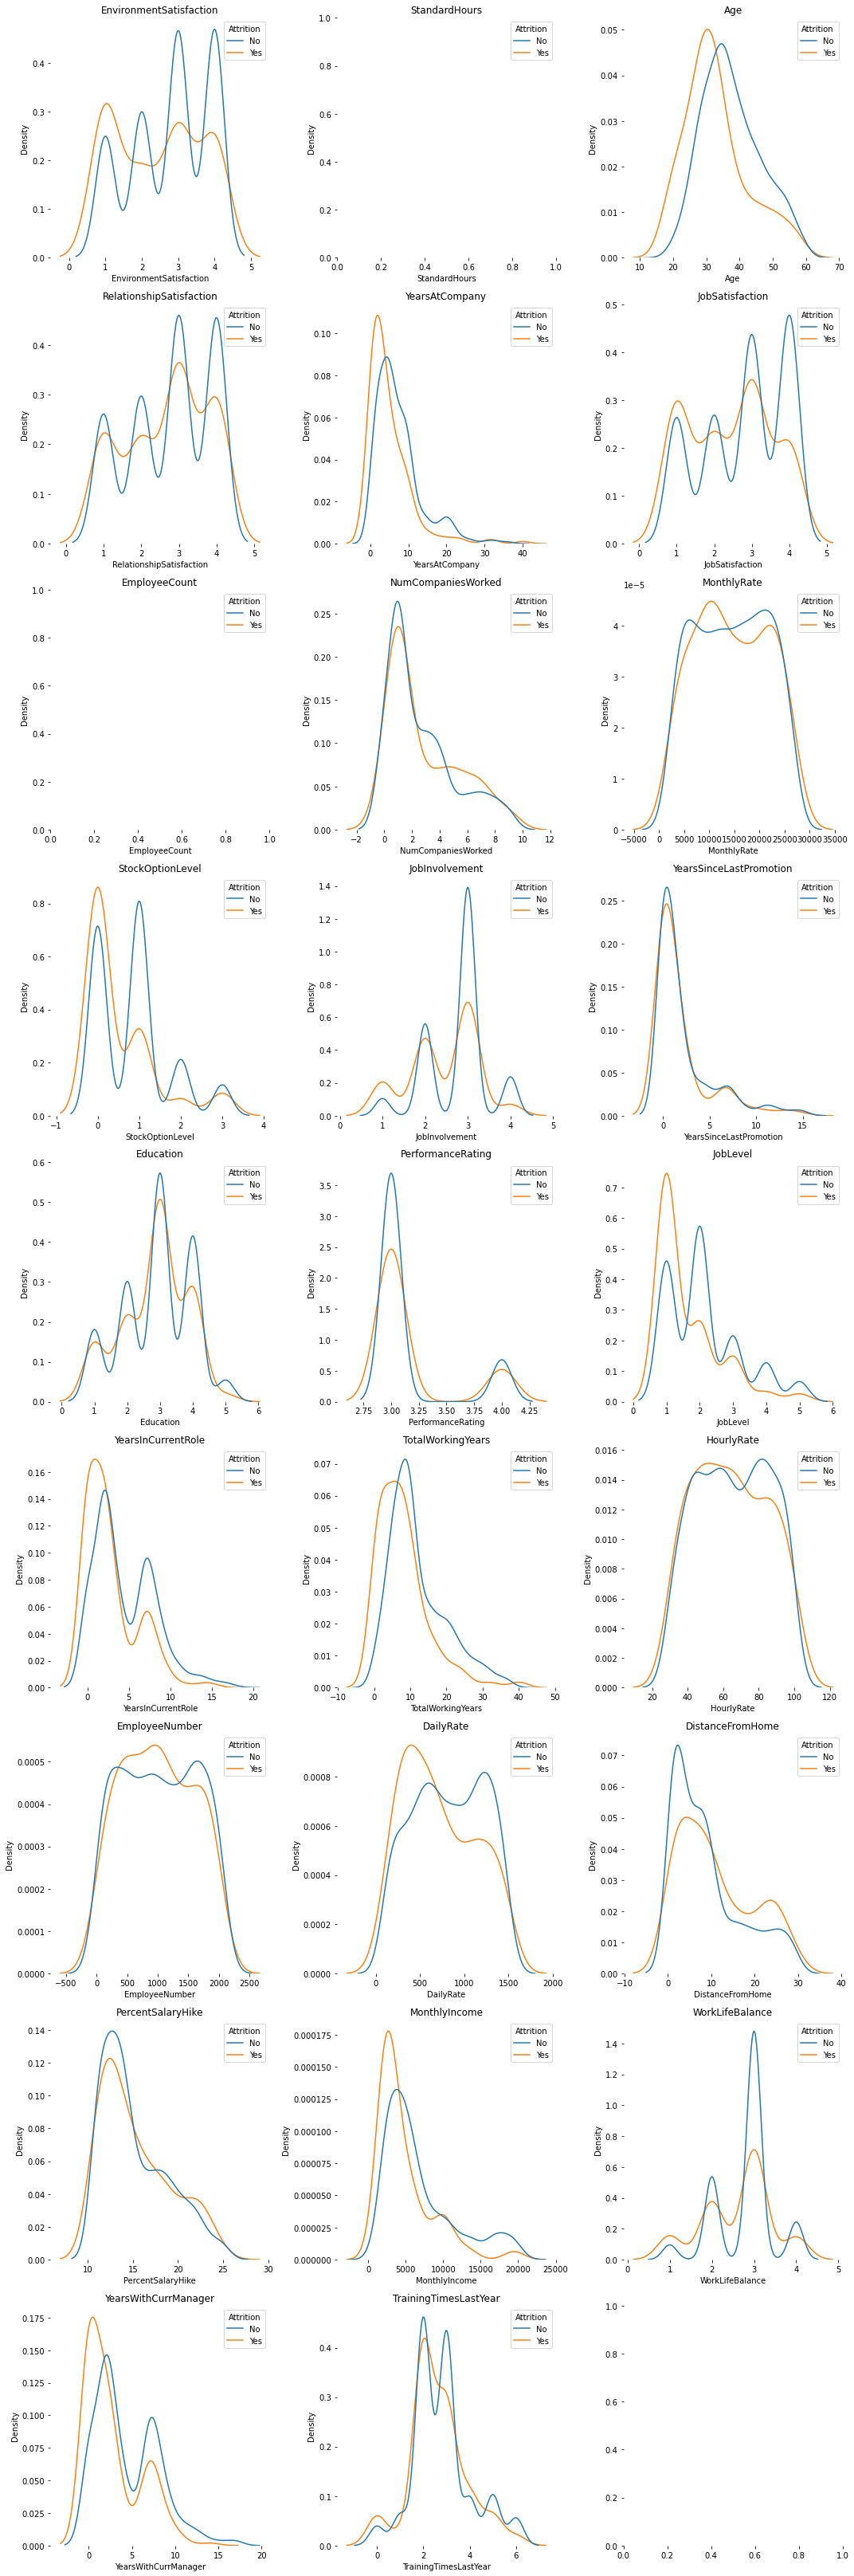

In [41]:
num_rows = 9
num_cols = 3
fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 45))
row = -1
for i in range(num_rows * num_cols):
    col = i % num_cols
    if col == 0:
        row += 1
    if i < len(numeric_features):
        feature = numeric_features[i]
        plot = sns.kdeplot(x=feature, data=train, common_norm = False, hue="Attrition", ax=ax[row,col])
        plot.set_title(feature)
        sns.despine(left=True, bottom=True)
        
fig.tight_layout()

#### Yorumlar

- Çoğu kolonda bir attritiona göre farklı dağılım görülebilmekte.
- Environment Satisfaction değeri düşükse Attrition oranı artmakta.
- PerformanceRating değeri düşükse Attrition oranı daha düşük gibi gözüküyor.
- hourly rate 70 in üzerindeyse Attrition daha düşük gözüküyor.
- YearsSinceLastPromotion'ın doğrudan korelasyonu düşük gibi duruyor.
- Stock option var yok şekline getirilebilir.
- Education değerinin doğrudan bir korelasyonu olmayabilir
- Toplam çalışma yılı daha düşük çalışanlar düşük miktarda daha yüksek attrition gösteriyor.
- jobinvolment arttıkça attrition azalıyor gibi duruyor.
- job level 1 olanların attrition oranı ciddi oranda yüksek.
- Genç çalışanlar düşük miktarda daha yüksek attrition gösteriyor.

### Multivariate Analysis

#### Correlation Matrix

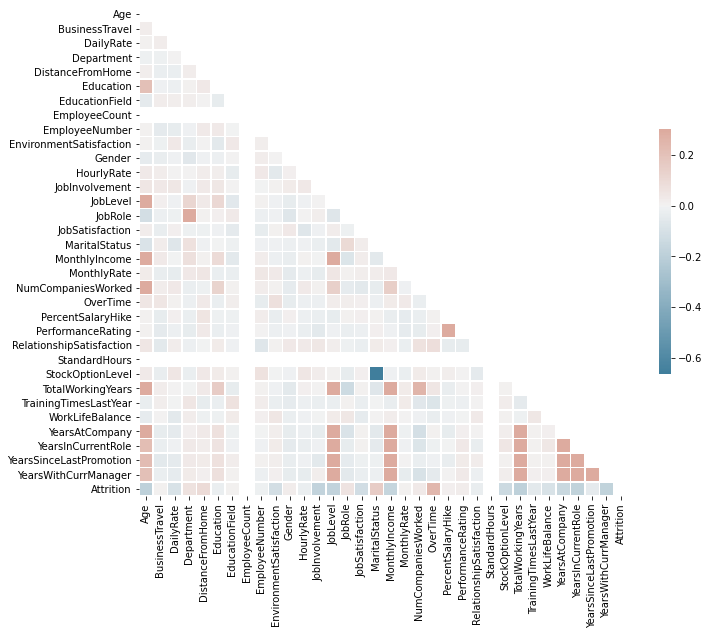

In [42]:
from sklearn import preprocessing  
le = preprocessing.LabelEncoder()
columns_to_encode = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime", "Attrition"]

train_copy = train.copy()
train_copy[columns_to_encode] = train_copy[columns_to_encode].apply(le.fit_transform)

# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = train_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
_ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

- Beklendiği üzere yaş ile yıl bazlı kolonların yüksek korelasyonu bulunmakta. MaritalStatus ile StockOptionLevel parametresinin önemli bir korelasyonu mevcut.

#### Farklı Kolonların Etkileşiminin Görselleştirilmesi

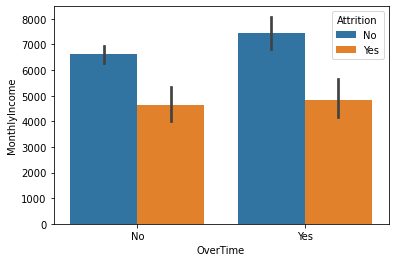

In [43]:
# fazla mesai ile maas arasindaki iliski onemli mi 

# overtime: binary, categorical 
# monthlyincome: continuous 
# attrition: binary, categorical 
 
_ = sns.barplot(data=train, x="OverTime", y="MonthlyIncome", hue="Attrition")

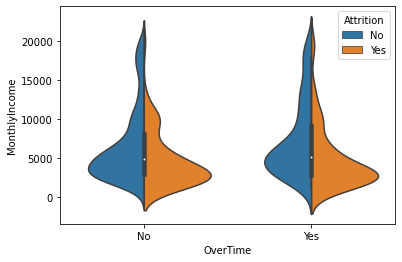

In [44]:
_ = sns.violinplot(data=train, x="OverTime", y="MonthlyIncome", hue="Attrition", split=True)

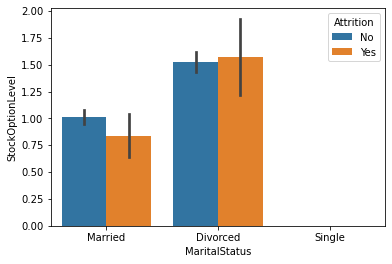

In [45]:
# marital status: binary 
# stock option: binary 
# attirition: binary 
 
_ = sns.barplot(data=train, x="MaritalStatus", y="StockOptionLevel", hue="Attrition")

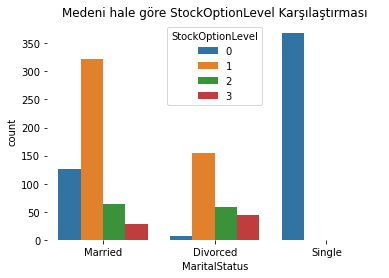

In [46]:
sns.countplot(x="MaritalStatus", hue="StockOptionLevel", data=train).set_title("Medeni hale göre StockOptionLevel Karşılaştırması")
sns.despine(left=True, bottom=True)

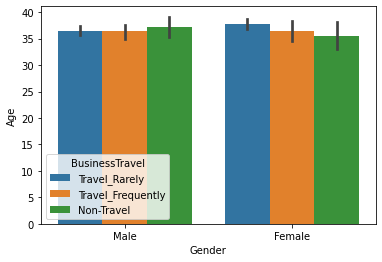

In [47]:
# yasına ve cinsiyetine gore gezmesı onemlı mı ---> degil
 
# Age: cont (y)
# Gender: binary 
# Businesstravel: binary 
 
_=sns.barplot(data=train, x="Gender", y="Age", hue="BusinessTravel")

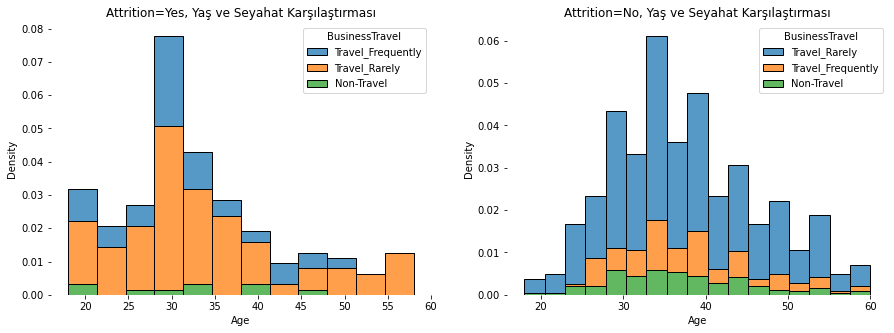

In [48]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

fig1 = sns.histplot(data=train[train["Attrition"] == "Yes"], x="Age", hue="BusinessTravel", multiple="stack", stat="density", ax=ax[0])
fig2 = sns.histplot(data=train[train["Attrition"] == "No"], x="Age", hue="BusinessTravel", multiple="stack", stat="density", ax=ax[1])

fig1.set_title("Attrition=Yes, Yaş ve Seyahat Karşılaştırması")
fig2.set_title("Attrition=No, Yaş ve Seyahat Karşılaştırması")

sns.despine(left=True, bottom=True)

- Rarely veya Frequently seyahat oranı çok yüksek olduğu için çıkarım yapmak güç. Fakat Seyahat etmeyenlerin attrition oranının daha düşük olduğu görülmekte. Fakat yaşa bağlı olarak BusinessTravel kolonunun Attrition üzerinde ciddi bir etkisi olduğu görülmemekte.

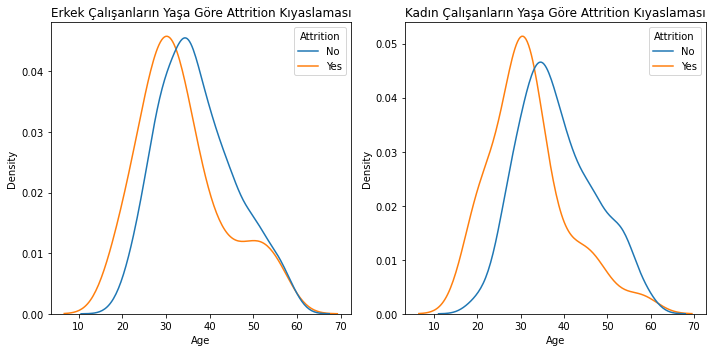

In [49]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

sns.kdeplot(data=train[train["Gender"] == "Male"], ax=ax[0], common_norm = False, x="Age", hue='Attrition').set_title('Erkek Çalışanların Yaşa Göre Attrition Kıyaslaması')
sns.kdeplot(data=train[train["Gender"] == "Female"], ax=ax[1], common_norm = False, x="Age", hue='Attrition').set_title('Kadın Çalışanların Yaşa Göre Attrition Kıyaslaması')
plt.tight_layout()

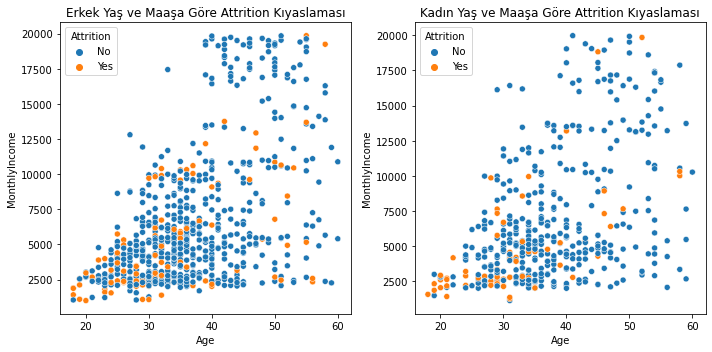

In [50]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

sns.scatterplot(data=train[train["Gender"] == "Male"], ax=ax[0], x="Age", y="MonthlyIncome", hue='Attrition').set_title('Erkek Yaş ve Maaşa Göre Attrition Kıyaslaması')
sns.scatterplot(data=train[train["Gender"] == "Female"], ax=ax[1], x="Age", y="MonthlyIncome", hue='Attrition').set_title('Kadın Yaş ve Maaşa Göre Attrition Kıyaslaması')
plt.tight_layout()

* Kadın çalışanların yaşı arttıkça attrition oranı düşmekte.
* Yaşa göre alınan maaşın attrition üzerinde belirgin bir etkisi bulunmamakta.

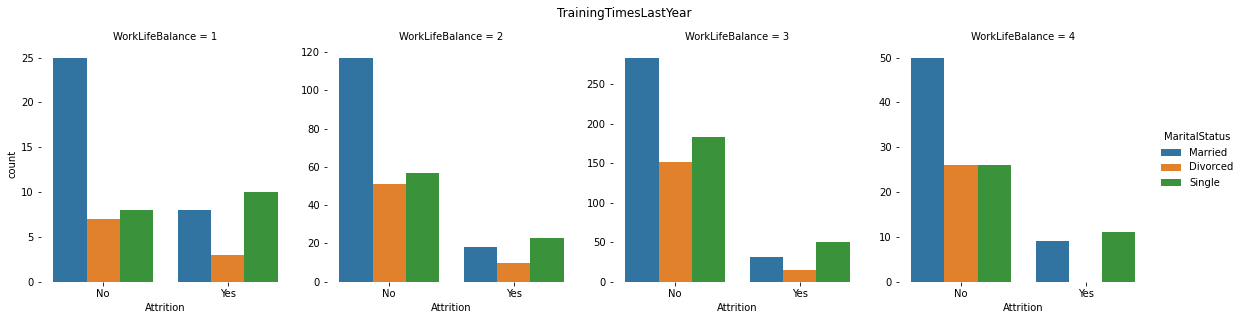

In [51]:
fig = sns.catplot(x="Attrition", kind="count", col="WorkLifeBalance", hue="MaritalStatus", sharey=False, data=train, height=4, col_wrap=4)
fig.fig.suptitle(feature, y=1.05)
sns.despine(left=True, bottom=True)

- Medeni hale göre İş-Hayat dengesinin Attrition üzerinde ciddi bir etkisi görülmemekte.

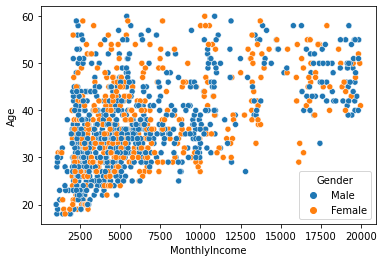

In [52]:
# yas cinsiyet maas etkisi var mı: yok  

# yas: cont
# cinsiyet: binary 
# gelir durumu: cont (iki cont scatter, biri binary ise (x ekseninde) bar plot olabilir) 
 
_=sns.scatterplot(data=train, x="MonthlyIncome", y="Age", hue="Gender")   

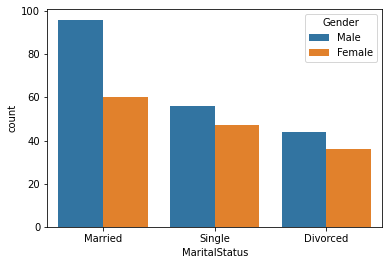

In [53]:
# marital status: binary 
# cinsiyet: binary 
# attrition: binary 
 
_=sns.countplot(data=train[train["OverTime"] == "Yes"], x="MaritalStatus", hue="Gender")


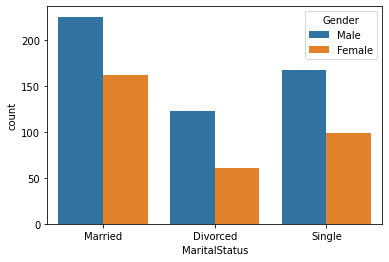

In [54]:
_=sns.countplot(data=train[train["OverTime"] == "No"], x="MaritalStatus", hue="Gender")

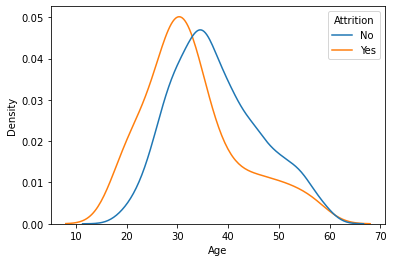

In [55]:
# Age
# Attrition
_ = sns.kdeplot(data=train, x="Age", hue='Attrition', common_norm = False)

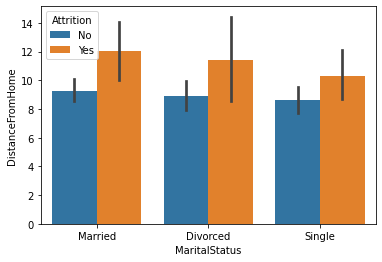

In [56]:
# evden uzaklik evlilik 
# distance from home(cont), marital status(binary), attrition(binary) 
 
_=sns.barplot(data=train, x="MaritalStatus", y="DistanceFromHome", hue="Attrition")


### Veri Analizi Yorumları

-

<hr style="height:0.5px;border-width:0;color:black;background-color:black">


## Veri Düzenleme

In [57]:
train_cleaned = train.copy()  
train_cleaned.shape 

(1176, 35)

### Gereksiz Kolonların Silinmesi

In [58]:
columns_to_drop = ["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"]
train_cleaned.drop(columns = columns_to_drop, inplace=True) 
train_cleaned.shape

(1176, 31)

In [59]:
train_cleaned.head(10)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,30,Travel_Rarely,911,Research & Development,1,2,Medical,4,Male,76,...,3,0,12,6,2,12,8,1,7,No
1,48,Travel_Frequently,365,Research & Development,4,5,Medical,3,Male,89,...,2,1,23,3,3,2,2,2,2,No
2,27,Travel_Rarely,1469,Research & Development,1,2,Medical,4,Male,82,...,2,1,5,2,3,5,2,0,4,No
3,34,Travel_Rarely,704,Sales,28,3,Marketing,4,Female,95,...,4,2,8,2,3,8,7,1,7,No
4,23,Travel_Frequently,638,Sales,9,3,Marketing,4,Male,33,...,1,1,1,3,2,1,0,1,0,Yes
5,29,Travel_Rarely,726,Research & Development,29,1,Life Sciences,4,Male,93,...,4,2,11,3,3,7,0,1,6,No
6,45,Travel_Rarely,1448,Research & Development,29,3,Technical Degree,2,Male,55,...,4,2,10,4,4,3,1,1,2,No
7,29,Travel_Rarely,1328,Research & Development,2,3,Life Sciences,3,Male,76,...,4,1,6,3,3,5,4,0,4,No
8,28,Travel_Rarely,529,Research & Development,2,4,Life Sciences,1,Male,79,...,3,0,5,5,1,0,0,0,0,Yes
9,36,Travel_Frequently,1302,Research & Development,6,4,Life Sciences,1,Male,80,...,4,1,9,3,3,3,2,0,2,No


In [60]:
train_cleaned.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

### Yeni Özniteliklerin Yaratılması (Mümkünse)

In [61]:
# ORTALAMA ATTRITION YEAR DEGERI = tecrube yılı / calıstıgı sırket sayısı
 
train_cleaned["AvgAttrition"] = train_cleaned["TotalWorkingYears"] / (train_cleaned["NumCompaniesWorked"] + 1) 
train_cleaned["AvgAttrition"].describe()

count    1176.000000
mean        4.184091
std         3.925013
min         0.000000
25%         1.666667
50%         3.000000
75%         5.000000
max        38.000000
Name: AvgAttrition, dtype: float64

In [62]:
train_cleaned["Attrition"] = train_cleaned["Attrition"].map({"Yes":1, "No":0}) 
train_cleaned["AvgAttrition"].corr(train_cleaned["Attrition"])

-0.17991854327339415

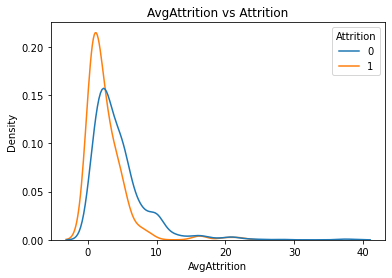

In [63]:
fig = sns.kdeplot(data=train_cleaned, x="AvgAttrition", hue="Attrition", common_norm=False)
_ = fig.set_title("AvgAttrition vs Attrition")

- Yeni yarattığımız kolonun Attrition değeri ile arasında bir negatif korelasyon var. MeanAttritionYear değeri ne kadar yüksekse Attrition ihtimali o kadar azalıyor.

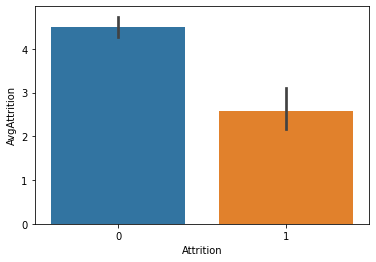

In [64]:
# AvgAttrition: cont
# Attrition: binary

_ = sns.barplot(x="Attrition", y='AvgAttrition', data=train_cleaned)

In [65]:
# Kisinin ayni tecrube seviyesindeki insanlara gore maasinin durumu

meanYearIncome = train_cleaned.groupby('TotalWorkingYears')['MonthlyIncome'].mean()

train_cleaned['MeanYearIncome'] = train_cleaned.apply(
        lambda x: meanYearIncome[x['TotalWorkingYears']], axis=1
    ) 

In [66]:
train_cleaned['OverYearIncomeAvg'] = train_cleaned.apply(
        lambda x: 1 if x['MonthlyIncome'] > x['MeanYearIncome'] else 0, axis=1
    ) 

In [67]:
train_cleaned['OverYearIncomeAvg'].describe()

count    1176.000000
mean        0.456633
std         0.498328
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: OverYearIncomeAvg, dtype: float64

Tecrübenin Kategorik Hale Getirilmesi

In [68]:
bins=pd.IntervalIndex.from_tuples([(-1,5), (5,10), (10,15), (15,100)]) 
cat_YearsAtCompany = pd.cut(train_cleaned["YearsAtCompany"].to_list(), bins) 
cat_YearsAtCompany.categories=[0,1,2,3]

In [69]:
train_cleaned["YearsAtCompanyCat"] = cat_YearsAtCompany
train_cleaned["YearsAtCompanyCat"]

0       2
1       0
2       0
3       1
4       0
       ..
1171    0
1172    1
1173    0
1174    1
1175    0
Name: YearsAtCompanyCat, Length: 1176, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [70]:
train_cleaned["YearsAtCompany"].corr(train_cleaned["Attrition"])

-0.1499831466318738

In [71]:
train_cleaned["YearsAtCompanyCat"].corr(train_cleaned["Attrition"])

-0.1417285226546548

In [72]:
train_cleaned.drop(columns=['YearsAtCompanyCat'], inplace=True)

In [73]:
train_cleaned.shape

(1176, 34)

### Kategorik Değerleri Sayısal Değerlere Dönüştürme

- Manuel, LabelEncoder: 

In [74]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

train_cleaned['Department'] = le.fit_transform(train_cleaned['Department'],
train_cleaned['EducationField'] = le.fit_transform(train_cleaned['EducationField']),
train_cleaned['MaritalStatus'] = le.fit_transform(train_cleaned['MaritalStatus'])

train_cleaned["BusinessTravel"].unique()

train_cleaned["BusinessTravel"] = train_cleaned["BusinessTravel"].map(
{ "Travel_Rarely":1, "Travel_Frequently":2, "Non-Travel":0})

train_cleaned['BusinessTravel'].unique()

train_cleaned['BusinessTravel']

train_cleaned["Attrition"].unique()

- One Hot Encoding:

In [75]:
columns_to_encode = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]

In [76]:
train_cleaned.columns


Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'AvgAttrition', 'MeanYearIncome',
       'OverYearIncomeAvg'],
      dtype='object')

In [77]:
train_cleaned.shape

(1176, 34)

In [78]:
from sklearn.preprocessing import OneHotEncoder 
encoder=OneHotEncoder(drop="if_binary") 
encoder_df=pd.DataFrame(encoder.fit_transform(train_cleaned[columns_to_encode]).toarray()) 
column_names=encoder.get_feature_names(columns_to_encode) 
column_names

C:\Users\Fulden\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_Yes'], dtype=object)

In [79]:
encoder_df.columns = column_names 
train_cleaned.drop(columns=columns_to_encode, inplace=True, axis=1)

In [80]:
train_cleaned=train_cleaned.join(encoder_df)

In [81]:
train_cleaned.groupby("TotalWorkingYears")["MonthlyIncome"].count()

TotalWorkingYears
0       7
1      69
2      26
3      29
4      52
5      72
6      99
7      60
8      84
9      81
10    153
11     29
12     35
13     29
14     28
15     34
16     27
17     26
18     23
19     20
20     26
21     28
22     14
23     18
24     15
25     12
26     11
27      7
28      9
29     10
30      6
31      8
32      7
33      5
34      2
35      3
36      5
37      4
38      1
40      2
Name: MonthlyIncome, dtype: int64

In [82]:
train_cleaned.shape

(1176, 53)

In [83]:
                
import pickle 
with open("OneHotEncoder.pkl", "wb") as f: #write binary 
    pickle.dump(encoder, f)
    
    

### PCA

In [84]:
from sklearn.decomposition import PCA

In [85]:
train_cleaned.shape

(1176, 53)

In [86]:
#train_cleaned['Gender'] = train_cleaned['Gender'].map({'Male': 1, 'Female': 0})

In [87]:
train_cleaned_1 = train_cleaned.copy()

In [88]:
pca = PCA(n_components=5)
pca.fit(train_cleaned_1)

PCA(n_components=5)

In [89]:
transformer_train = pca.transform(train_cleaned_1)

In [90]:
transformer_train

array([[-1.05508715e+04, -1.65221068e+03, -1.24246654e+03,
        -7.56534070e+01, -9.91075658e+00],
       [-8.00575034e+03,  1.23022280e+04, -4.35318423e+02,
         4.68210621e+02, -2.29385016e+01],
       [ 3.13003289e+03, -4.20140185e+03,  5.92889755e+02,
        -6.77904499e+02, -1.63596314e+01],
       ...,
       [-4.30668369e+02, -3.12131534e+03,  1.31321987e+03,
        -3.57022283e+02,  2.58531183e+00],
       [ 8.37881988e+03, -8.37709596e+02, -4.74765486e+02,
         1.32215240e+02, -8.14402610e-01],
       [-1.82588997e+03, -5.31065793e+03,  1.12743044e+03,
         6.67881502e+02, -1.80567603e+01]])

In [91]:
print(pca.explained_variance_ratio_)

[5.78169356e-01 3.87594754e-01 3.24013280e-02 1.82742024e-03
 4.61200469e-06]


In [92]:
pca.singular_values_

array([245191.22065243, 200754.97947867,  58044.19416595,  13784.67708149,
          692.50394375])

### Öznitelik Seçimi

#### Yöntem 1: Kolineer Özniteliklerin Silinmesi

In [93]:
# Kolerasyon matrixinde mutlak değerlerin çıkarılması

corr_matrix = train_cleaned.corr().abs()
corr_matrix.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
Age,1.000000,0.007605,0.016341,0.206040,0.006536,0.030195,0.044573,0.525635,0.020958,0.511113,...,0.292684,0.047311,0.195030,0.136894,0.010985,0.189303,0.029533,0.073977,0.106034,0.048122
DailyRate,0.007605,1.000000,0.023193,0.018384,0.039596,0.000717,0.044121,0.011012,0.013897,0.001130,...,0.020222,0.004519,0.017035,0.012681,0.008417,0.004542,0.026476,0.048637,0.076061,0.008836
DistanceFromHome,0.016341,0.023193,1.000000,0.037325,0.002459,0.024361,0.034573,0.031966,0.012575,0.010391,...,0.020953,0.018255,0.016768,0.004864,0.040876,0.037924,0.011032,0.032050,0.024514,0.036233
Education,0.206040,0.018384,0.037325,1.000000,0.047632,0.014320,0.041072,0.101166,0.009864,0.094824,...,0.039775,0.014976,0.052841,0.019528,0.041574,0.085101,0.003836,0.004292,0.001162,0.026259
EnvironmentSatisfaction,0.006536,0.039596,0.002459,0.047632,1.000000,0.052963,0.004800,0.010662,0.005268,0.017276,...,0.022486,0.072073,0.038738,0.027687,0.018603,0.027551,0.021882,0.019349,0.001112,0.074544


In [94]:
# Kolerasyon üçgeninin oluşturulması

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

<ipython-input-94-62b5c5a066db>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
Age,NaN,0.007605,0.016341,0.206040,0.006536,0.030195,0.044573,0.525635,0.020958,0.511113,...,0.292684,0.047311,0.195030,0.136894,0.010985,0.189303,0.029533,0.073977,0.106034,0.048122
DailyRate,NaN,NaN,0.023193,0.018384,0.039596,0.000717,0.044121,0.011012,0.013897,0.001130,...,0.020222,0.004519,0.017035,0.012681,0.008417,0.004542,0.026476,0.048637,0.076061,0.008836
DistanceFromHome,NaN,NaN,NaN,0.037325,0.002459,0.024361,0.034573,0.031966,0.012575,0.010391,...,0.020953,0.018255,0.016768,0.004864,0.040876,0.037924,0.011032,0.032050,0.024514,0.036233
Education,NaN,NaN,NaN,NaN,0.047632,0.014320,0.041072,0.101166,0.009864,0.094824,...,0.039775,0.014976,0.052841,0.019528,0.041574,0.085101,0.003836,0.004292,0.001162,0.026259
EnvironmentSatisfaction,NaN,NaN,NaN,NaN,NaN,0.052963,0.004800,0.010662,0.005268,0.017276,...,0.022486,0.072073,0.038738,0.027687,0.018603,0.027551,0.021882,0.019349,0.001112,0.074544


In [95]:
# Özniteliklerin silinme threshold'u
# Bu öznitelikler sadece tek boyutta bakılıyor. Nonlineeri anlayamaz.

threshold = 0.8

In [96]:
# Thresholdun üzerindeki korelasyonların seçilmesi
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('Silinecek kolon sayısı %d :' % (len(to_drop)))
print(to_drop)

Silinecek kolon sayısı 5 :
['MonthlyIncome', 'MeanYearIncome', 'Department_Sales', 'JobRole_Human Resources', 'JobRole_Sales Executive']


In [97]:
selection1 = train_cleaned.drop(columns = to_drop)
selection1.describe() 
# Correlation matrix'den seçerek de silebiliriz.

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,36.859694,804.922619,9.329082,2.897959,2.724490,65.544218,2.714286,2.058673,2.723639,14464.356293,...,0.179422,0.067177,0.096939,0.056973,0.194728,0.057823,0.224490,0.461735,0.313776,0.288265
std,9.115610,402.627249,8.109130,1.030495,1.093398,20.202669,0.718154,1.094260,1.102100,7146.269744,...,0.383868,0.250435,0.296000,0.231889,0.396160,0.233508,0.417423,0.498746,0.464224,0.453148
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,2094.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,466.750000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,8307.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,802.000000,7.000000,3.000000,3.000000,65.000000,3.000000,2.000000,3.000000,14465.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,1163.250000,14.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,20741.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,26999.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

selection2 = train_cleaned.drop(columns=['Attrition'])
selection2 = sel.fit_transform(selection2)

selection2

array([[3.000e+01, 9.110e+02, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [4.800e+01, 3.650e+02, 4.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.700e+01, 1.469e+03, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [4.000e+01, 1.151e+03, 9.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [3.400e+01, 6.580e+02, 7.000e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [2.000e+01, 1.290e+02, 4.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [99]:
labels = train_cleaned['Attrition']
labels.head()

0    0
1    0
2    0
3    0
4    1
Name: Attrition, dtype: int64

In [100]:
selection3 = train_cleaned.drop(columns=['Attrition'])

In [101]:
selection3.shape

(1176, 52)

In [102]:
# Select k best
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selection3 = SelectKBest(chi2, k=10).fit_transform(selection3, labels)

In [103]:
selection3

array([[3.00000000e+01, 9.11000000e+02, 1.00000000e+00, ...,
        7.00000000e+00, 6.00000000e+00, 6.03665714e+03],
       [4.80000000e+01, 3.65000000e+02, 4.00000000e+00, ...,
        2.00000000e+00, 7.66666667e+00, 1.43030556e+04],
       [2.70000000e+01, 1.46900000e+03, 1.00000000e+00, ...,
        4.00000000e+00, 2.50000000e+00, 3.48122222e+03],
       ...,
       [4.00000000e+01, 1.15100000e+03, 9.00000000e+00, ...,
        2.00000000e+00, 5.00000000e-01, 3.48122222e+03],
       [3.40000000e+01, 6.58000000e+02, 7.00000000e+00, ...,
        6.00000000e+00, 4.50000000e+00, 6.61872840e+03],
       [2.00000000e+01, 1.29000000e+02, 4.00000000e+00, ...,
        0.00000000e+00, 5.00000000e-01, 2.20213043e+03]])

In [104]:
selection3.shape

(1176, 10)

In [105]:
# LinearSVC feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

selection4 = train_cleaned.drop(columns=['Attrition'])
selection4.shape

(1176, 52)

In [106]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(selection4, labels)
model = SelectFromModel(lsvc, prefit=True)
selection4 = model.transform(selection4)
selection4.shape

C:\Users\Fulden\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(1176, 18)

In [107]:
feature_idx = model.get_support()
print(feature_idx)

[ True  True  True False  True  True  True False  True  True False  True
  True False False  True  True False False  True  True  True  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True]


In [108]:
new_train = train_cleaned.drop(columns=['Attrition'])

feature_name = new_train.columns[feature_idx]
feature_name

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'AvgAttrition',
       'OverTime_Yes'],
      dtype='object')

In [109]:
# Tree-based feature selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

selection5 = train_cleaned.drop(columns=['Attrition'])
selection5.shape

(1176, 52)

In [110]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(selection5, labels)
clf.feature_importances_  

array([0.03577864, 0.02712065, 0.0309617 , 0.02110679, 0.02958106,
       0.02669504, 0.03181714, 0.02359035, 0.03040133, 0.03081612,
       0.02255949, 0.02105057, 0.02489817, 0.0112371 , 0.02488844,
       0.02446404, 0.0302527 , 0.02358626, 0.03176398, 0.02782109,
       0.02796542, 0.02435448, 0.0266961 , 0.03131991, 0.0294895 ,
       0.01490972, 0.005337  , 0.01864188, 0.01166483, 0.00343983,
       0.009592  , 0.01075235, 0.00495527, 0.01457387, 0.00885636,
       0.0133608 , 0.0046716 , 0.01347081, 0.02125436, 0.00510459,
       0.0035359 , 0.01699519, 0.00269107, 0.00560629, 0.0019617 ,
       0.00962003, 0.00802749, 0.0123644 , 0.00958606, 0.01347107,
       0.02372311, 0.06161636])

In [111]:
model = SelectFromModel(clf, prefit=True)
selection5 = model.transform(selection5)
selection5.shape

C:\Users\Fulden\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(1176, 27)

In [112]:
# Feature Selection as part of a pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

selection6 = train_cleaned.drop(columns=['Attrition'])
selection6.shape

(1176, 52)

In [113]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
  ('classification', RandomForestClassifier())
])
#clf.fit(selection6, labels)

In [114]:
# Model eğittikten sonra feature importance ölçülmektedir. 
# Özniteliklerin önemini model eğittikten sonra grafik olarak koyabiliriz.

<hr style="height:0.5px;border-width:0;color:black;background-color:black">


## Model Eğitimi 

In [115]:
train_cleaned.dtypes

Age                                    int64
DailyRate                              int64
DistanceFromHome                       int64
Education                              int64
EnvironmentSatisfaction                int64
HourlyRate                             int64
JobInvolvement                         int64
JobLevel                               int64
JobSatisfaction                        int64
MonthlyIncome                          int64
MonthlyRate                            int64
NumCompaniesWorked                     int64
PercentSalaryHike                      int64
PerformanceRating                      int64
RelationshipSatisfaction               int64
StockOptionLevel                       int64
TotalWorkingYears                      int64
TrainingTimesLastYear                  int64
WorkLifeBalance                        int64
YearsAtCompany                         int64
YearsInCurrentRole                     int64
YearsSinceLastPromotion                int64
YearsWithC

In [116]:
# MINI DEMO 

from sklearn import metrics  
 
dummy_y_true = [1,1,1,0,0,0]
dummy_y_pred = [1,1,0,1,1,0] 
dummy_y_prob = [0.95,0.55,0.05,0.55,0.65,0.10] 
 
acc = metrics.accuracy_score(dummy_y_true, dummy_y_pred) 
p = metrics.precision_score(dummy_y_true, dummy_y_pred) 
r = metrics.recall_score(dummy_y_true, dummy_y_pred) 
f1 = metrics.f1_score(dummy_y_true, dummy_y_pred) 
 
fpr, tpr, thresholds= metrics.roc_curve(dummy_y_true, dummy_y_prob) 
roc_auc = metrics.auc(fpr, tpr) 
 
#recision, recall, thresholds = metrics.precision_recall_curve(dummy_y_true, dummy_y_prob) 
#r_auc = metrics.auc(fpr, tpr) 
##"pr_auc": pr_auc

In [117]:
pd.DataFrame({"acc": acc, "p": p, "r": r, "f1": f1, "roc_auc": roc_auc},index=["values"])

,acc,p,r,f1,roc_auc
values,0.5,0.5,0.666667,0.571429,0.5


Text(0, 0.5, 'TPR')

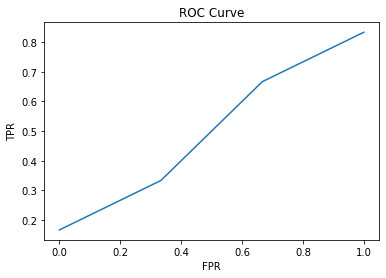

In [118]:
ax = sns.lineplot(x=fpr, y=tpr, ci=None)
ax.set_title('ROC Curve')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

In [119]:
#ax = sns.lineplot(x=recall, y=precision, ci=None)
#ax.set_title('PR Curve')
#ax.set_xlabel('Recall')
#ax.set_ylabel('Precision')

### Attrition Prediction

#### Başarım Ölçüm Fonksiyonları

In [120]:
def eval_clf(y_true, y_pred): 
    acc = metrics.accuracy_score(y_true, y_pred) 
    p = metrics.precision_score(y_true, y_pred)  
    r = metrics.recall_score(y_true, y_pred) 
    f1 = metrics.f1_score(y_true, y_pred) 
    result = {"acc": acc, "p": p, "r": r, "f1": f1} 
    return result 
 
def eval_auc(y_true, y_prob): 
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_prob) 
    #eturn roc_auc 
    precision, recall, thresholds = metrics.precision_recall_curve(y_true, y_prob)
    
    roc_auc = metrics.auc(fpr, tpr)
    pr_auc = metrics.auc(recall, precision)
    
    result = {
        'roc_auc': roc_auc,
        'pr_auc': pr_auc
    }
    
    return result

 
def eval_threshold(y_true, y_prob, threshold): 
    y_pred= np.where(np.array(y_prob) > threshold, 1, 0) 
     
    return eval_clf(y_true, y_pred)

In [121]:
#test 
 
dummy_y_true = [1, 1, 1, 0, 0, 0]
dummy_y_pred = [1, 1, 0, 1, 1, 0]
dummy_y_prob = [0.95, 0.55, 0.05, 0.55, 0.65, 0.10]


print('-' * 10)
print('res_clf')
res_clf = eval_clf(dummy_y_true, dummy_y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(dummy_y_true, dummy_y_prob)
print(res_auc)

print('-' * 10)
print('res_thr threshold=0.5')
res_thr = eval_threshold(dummy_y_true, dummy_y_prob, threshold=0.5)
print(res_thr)

print('-' * 10)
print('res_thr threshold=0.70')
res_thr = eval_threshold(dummy_y_true, dummy_y_prob, threshold=0.7)
print(res_thr)

----------
res_clf
{'acc': 0.5, 'p': 0.5, 'r': 0.6666666666666666, 'f1': 0.5714285714285715}
----------
res_auc
{'roc_auc': 0.5, 'pr_auc': 0.6499999999999999}
----------
res_thr threshold=0.5
{'acc': 0.5, 'p': 0.5, 'r': 0.6666666666666666, 'f1': 0.5714285714285715}
----------
res_thr threshold=0.70
{'acc': 0.6666666666666666, 'p': 1.0, 'r': 0.3333333333333333, 'f1': 0.5}


#### Veri Hazırlığı

In [122]:
y_data = train_cleaned["Attrition"] 
x_data = train_cleaned.drop(columns =["Attrition"])

In [123]:
print(x_data.shape) 
print(y_data.shape) 
assert x_data.shape[0] == y_data.shape[0]

(1176, 52)
(1176,)


### Logistic Regression

In [124]:
from sklearn.model_selection import train_test_split 
 
x_train, x_val, y_train, y_val = train_test_split(x_data.values, y_data.values, test_size = 0.15, stratify=y_data, random_state = 42)

In [125]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(max_iter = 10000, random_state = 42, solver = "liblinear") 
classifier.fit(x_train, y_train)

LogisticRegression(max_iter=10000, random_state=42, solver='liblinear')

In [126]:
#res_auc = eval_auc(dummy_y_true, dummy_y_prob) 
#print(res_auc)

In [127]:
y_pred = classifier.predict(x_val)
y_prob_2d = classifier.predict_proba(x_val)

print('y_pred')
print(y_pred)
print('y_prob')
print(y_prob_2d)

y_pred
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_prob
[[9.84576202e-01 1.54237976e-02]
 [8.99999309e-01 1.00000691e-01]
 [9.35197263e-01 6.48027373e-02]
 [9.50955092e-01 4.90449079e-02]
 [9.73631834e-01 2.63681663e-02]
 [8.35749460e-01 1.64250540e-01]
 [9.79416965e-01 2.05830345e-02]
 [9.34453896e-01 6.55461038e-02]
 [5.58337076e-01 4.41662924e-01]
 [9.81616130e-01 1.83838702e-02]
 [9.93302532e-01 6.69746777e-03]
 [8.17000363e-01 1.82999637e-01]
 [9.94610189e-01 5.38981146e-03]
 [9.56150563e-01 4.38494371e-02]
 [9.99466065e-01 5.33934980e-04]
 [8.39457749e-01 1.60542251e-01]
 [8.02387477e-01 1.97612523e-01]
 [9.90766650e-01 9.23334968e-03]
 [9.97380748e-01 2.61925231e-03]

In [128]:
y_prob = y_prob_2d[:, 1]
y_prob

array([1.54237976e-02, 1.00000691e-01, 6.48027373e-02, 4.90449079e-02,
       2.63681663e-02, 1.64250540e-01, 2.05830345e-02, 6.55461038e-02,
       4.41662924e-01, 1.83838702e-02, 6.69746777e-03, 1.82999637e-01,
       5.38981146e-03, 4.38494371e-02, 5.33934980e-04, 1.60542251e-01,
       1.97612523e-01, 9.23334968e-03, 2.61925231e-03, 1.56553784e-01,
       7.87770624e-03, 9.18851056e-02, 8.95431959e-03, 3.21086509e-01,
       1.59844381e-01, 6.06653394e-02, 5.56733885e-04, 1.36251608e-01,
       7.26138220e-02, 2.50293918e-01, 4.13999943e-02, 1.24219889e-01,
       4.33436656e-02, 3.60582332e-01, 1.28763448e-03, 1.08385847e-01,
       8.24511529e-01, 4.77618436e-02, 4.13174931e-02, 3.56363516e-02,
       4.78966490e-01, 7.58051426e-04, 6.93170849e-03, 1.39837054e-02,
       6.47220066e-01, 1.69738766e-01, 9.39865321e-02, 8.39928047e-01,
       8.04769466e-02, 3.72843021e-03, 7.50654398e-03, 3.23994910e-02,
       6.49025648e-02, 9.12747958e-02, 2.19281778e-03, 2.34470773e-02,
      

In [129]:
print('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.8757062146892656, 'p': 0.6875, 'r': 0.39285714285714285, 'f1': 0.5}
----------
res_auc
{'roc_auc': 0.8144774688398849, 'pr_auc': 0.5476345531495433}


#### Logistic Regression with Scaling

In [130]:
from sklearn.preprocessing import StandardScaler

print(x_train.shape)
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_val_scaled = sc.transform(x_val)

(999, 52)


In [131]:
classifier = LogisticRegression(max_iter=10000, random_state = 42)
classifier.fit(x_train_scaled, y_train)

y_pred = classifier.predict(x_val_scaled)
y_prob_2d = classifier.predict_proba(x_val_scaled)
y_prob = y_prob_2d[:, 1]

In [132]:
print('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.8700564971751412, 'p': 0.6666666666666666, 'r': 0.35714285714285715, 'f1': 0.46511627906976744}
----------
res_auc
{'roc_auc': 0.8326941514860978, 'pr_auc': 0.5704018163188007}


In [133]:
eval_threshold(y_val, y_prob, threshold=0.3)

{'acc': 0.8135593220338984,
 'p': 0.41935483870967744,
 'r': 0.4642857142857143,
 'f1': 0.44067796610169496}

#### Logistic Regression with Different Hyperparameters

In [134]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_val_scaled = sc.transform(x_val)

In [135]:
# X_train ve X_val yerine X_train_scaled ve X_val_scaled koymayi dene-->same result
# C parametresiyle oynamayi dene-->
# Dokumentasyon sayfasindan diger parametlere goz at ve oyna
classifier = LogisticRegression(max_iter=100, C=2, random_state = 42, solver = "liblinear") #class_weight="balanced")
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_val)
y_prob_2d = classifier.predict_proba(x_val)
y_prob = y_prob_2d[:, 1]

In [136]:
print('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.8757062146892656, 'p': 0.6875, 'r': 0.39285714285714285, 'f1': 0.5}
----------
res_auc
{'roc_auc': 0.8099232981783318, 'pr_auc': 0.5501455061440089}


### K-Nearest Neighbour

In [137]:
from sklearn.neighbors import KNeighborsClassifier 
 
classifier = KNeighborsClassifier(n_neighbors = 1)#tek sayı verilir.
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [138]:
y_pred = classifier.predict(x_val)
y_prob_2d = classifier.predict_proba(x_val)
y_prob = y_prob_2d[:, 1]

In [139]:
print('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.7288135593220338, 'p': 0.11538461538461539, 'r': 0.10714285714285714, 'f1': 0.11111111111111112}
----------
res_auc
{'roc_auc': 0.47639022051773733, 'pr_auc': 0.18188520519028994}


### SVM

In [140]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
x_train_scaled = sc.fit_transform(x_train) 
x_val_scaled = sc.transform(x_val) #threshold yanlıs degıstırlebilir

In [141]:
from sklearn.svm import  SVC 
classifier = SVC(kernel = "rbf", random_state = 42, probability = True) #roc auc hesaplanabilmesi için probability =true
classifier.fit(x_train_scaled,y_train)

SVC(probability=True, random_state=42)

In [142]:
y_pred = classifier.predict(x_val_scaled)
y_prob_2d = classifier.predict_proba(x_val_scaled)
y_prob = y_prob_2d[:, 1]

In [143]:
print('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.847457627118644, 'p': 0.5714285714285714, 'r': 0.14285714285714285, 'f1': 0.2285714285714286}
----------
res_auc
{'roc_auc': 0.8053691275167786, 'pr_auc': 0.47967122823459885}


### Decision Tree

In [144]:
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier(random_state=0, criterion = "entropy") 
classifier.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [145]:
y_pred = classifier.predict(x_val)
y_prob_2d = classifier.predict_proba(x_val)
y_prob = y_prob_2d[:, 1]

In [146]:
print('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.8305084745762712, 'p': 0.4666666666666667, 'r': 0.5, 'f1': 0.4827586206896552}
----------
res_auc
{'roc_auc': 0.6963087248322147, 'pr_auc': 0.5228813559322034}


### Random Forest

In [147]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
x_train_scaled = sc.fit_transform(x_train) 
x_val_scaled = sc.transform(x_val)

In [148]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators = 300, criterion = "entropy", random_state = 0) 
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In [149]:
y_pred = classifier.predict(x_val_scaled)
y_prob_2d = classifier.predict_proba(x_val_scaled)
y_prob = y_prob_2d[:, 1]

In [150]:
print('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc) #threshold dusurulmelı (eval_auc kısmından)

----------
res_clf
{'acc': 0.1864406779661017, 'p': 0.16279069767441862, 'r': 1.0, 'f1': 0.28}
----------
res_auc
{'roc_auc': 0.6550814956855225, 'pr_auc': 0.2419756401679547}


### GBM

In [151]:
#gbm ---> agac bazlı. random forest, overfit olmaya meyilli. bu problemı cozmek ıcın gradient boosting machine var.
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
x_train_scaled = sc.fit_transform(x_train) 
x_val_scaled = sc.transform(x_val)

In [152]:
from sklearn.ensemble import GradientBoostingClassifier 
classifier = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, max_depth=4, random_state = 0) 
classifier.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=4, random_state=0)

In [153]:
y_pred = classifier.predict(x_val)
y_prob_2d = classifier.predict_proba(x_val)
y_prob = y_prob_2d[:, 1]

In [154]:
print('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.8305084745762712, 'p': 0.45454545454545453, 'r': 0.35714285714285715, 'f1': 0.4}
----------
res_auc
{'roc_auc': 0.7816395014381592, 'pr_auc': 0.4485298205547736}


In [155]:
# k fold validation a bakılabilir.

## Hyperparameter Optimization

In [156]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
x_train_scaled = sc.fit_transform(x_train) 
x_val_scaled = sc.transform(x_val)

In [157]:
import pickle 
with open("Scaler.pkl", "wb") as f: #write binary 
    pickle.dump(sc, f)

In [158]:
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression 
 
param_grid = [
    {
        'max_iter': [1000, 3000, 5000, 10000],
        'solver': ['newton-cg', 'lbfgs'],
        'C': [0.1, 0.5, 1, 2, 5],
        'class_weight': ['balanced', None]
    }
] 
 
lr_clf = LogisticRegression()
clf = GridSearchCV(lr_clf, param_grid, scoring='roc_auc', verbose=True)
clf.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 0.5, 1, 2, 5],
                          'class_weight': ['balanced', None],
                          'max_iter': [1000, 3000, 5000, 10000],
                          'solver': ['newton-cg', 'lbfgs']}],
             scoring='roc_auc', verbose=True)

In [159]:
clf.best_params_

{'C': 0.1, 'class_weight': None, 'max_iter': 1000, 'solver': 'newton-cg'}

In [160]:
y_pred = clf.predict(x_val_scaled)
y_prob_2d = clf.predict_proba(x_val_scaled)
y_prob = y_prob_2d[:, 1]

In [161]:
print('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf) 
 
print('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.8757062146892656, 'p': 0.7142857142857143, 'r': 0.35714285714285715, 'f1': 0.4761904761904762}
----------
res_auc
{'roc_auc': 0.838686481303931, 'pr_auc': 0.5864542758568926}


In [162]:
import pickle 
with open("LogisticRegression.pkl", "wb") as f: #write binary 
    pickle.dump(clf, f)
    
    

### xgboost

In [163]:
 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_val_scaled = sc.transform(x_val)  
 
 

In [164]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [165]:
import xgboost as xgb   
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier 

classifier = XGBClassifier(n_estimators = 100, learning_rate = 1.0, max_depth=4, random_state = 0, eval_metric='rmse') 
classifier.fit(x_train, y_train) 


C:\Users\Fulden\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='rmse', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=1.0, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [166]:
y_pred = classifier.predict(x_val)
y_prob_2d = classifier.predict_proba(x_val)
y_prob = y_prob_2d[:, 1]

In [167]:
print('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

----------
res_clf
{'acc': 0.8305084745762712, 'p': 0.45454545454545453, 'r': 0.35714285714285715, 'f1': 0.4}
----------
res_auc
{'roc_auc': 0.7576701821668264, 'pr_auc': 0.4230946470542535}




# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100]
    }
model = XGBClassifier()
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'accuracy',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(x_train,y_train)
#eval_metric
random_cv.best_params_ 
print('randomcv model accuracy score = {}'.format(random_cv.best_score_))

y_pred = random_cv.predict(x_val)
y_prob_2d = random_cv.predict_proba(x_val)
y_prob = y_prob_2d[:, 1]

print('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf)

print('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

In [168]:
parameters = {
        'n_estimators': [100, 500],
        'subsample': [0.8, 1.0], 
        'gamma' : [0,1,5],
        'max_depth': [3, 4, 5], 
        'learning_rate': [0.1, 0.3]}

In [169]:
#GridSearch ile tüm olası senaryolardaki modeller kurulacaktır.
xgboost = XGBClassifier()
xgboost_cv = GridSearchCV(xgboost, parameters, cv = 3, n_jobs = -1, verbose = 2)

xgboost_cv.fit(x_train, y_train)

#En yüksek tahmin oranını veren parametreler gösterilmiştir.
best = xgboost_cv.best_params_
best

y_pred = classifier.predict(x_val)
y_prob_2d = classifier.predict_proba(x_val)
y_prob = y_prob_2d[:, 1]

print('-' * 10)
print('res_clf')
res_clf = eval_clf(y_val, y_pred)
print(res_clf) 
 
print('-' * 10)
print('res_auc')
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

xgboost = XGBClassifier(best)
xgb_tuned =  xgboost.fit(x_train,y_train)

train_cleaned.describe

Template Hazırlanmasında Yardımcı Kaynak: https://www.kaggle.com/startupsci/titanic-data-science-solutions